# Regressing Transfer Market Value for Football Players 

We can describe this machine learning problem as a regression problem for football players market value prediction. Initially, we have 5 tables which correspond to the following:
- Players Data
- Games Data
- Club Data
- Competition Data
- Appearance Data

Each one of these tables correspond to one another and the main task is obtain one final table (or dataset) with relevant features in order to make market value predictions.
We will try a set of machine learning models after obtaining our dataset and we'll be evaluating our models based on pre-defined regression metrics being Root Mean Squared Error, Mean Squared Error and Mean Absolute Error.

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import math

# data preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler # Standardizing numerical features
from sklearn.preprocessing import OneHotEncoder # One-hot encoding categorical features

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor)

pd.set_option('display.max_columns', None)

## Exploring All Datasets
During the datasets exploration, we will modify each dataset to account for the final data combination. Each process will be explained thorughout the notebook

### Players Data

In [3]:
dataframe_players = pd.read_csv("dcereijo-player-scores/players")
dataframe_players.head()

,player_id,last_season,current_club_id,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,url
0,214258,2014,3729,andrey-naletov,Andrey Naletov,Russia,Russia,1996-03-31,Defender,Centre-Back,Right,179,NaN,23000.0,https://www.transfermarkt.co.uk/andrey-naletov...
1,45247,2014,1162,damien-perquis,Damien Perquis,France,France,1986-03-08,Goalkeeper,Goalkeeper,Right,186,360000.0,900000.0,https://www.transfermarkt.co.uk/damien-perquis...
2,61389,2014,3729,ivan-lozenkov,Ivan Lozenkov,UdSSR,Russia,1984-04-14,Defender,Centre-Back,Left,182,NaN,270000.0,https://www.transfermarkt.co.uk/ivan-lozenkov/...
3,217036,2014,3729,aleksandr-zakarlyuka,Aleksandr Zakarlyuka,Estonia,Russia,1995-06-24,Midfield,Central Midfield,Right,178,203000.0,203000.0,https://www.transfermarkt.co.uk/aleksandr-zaka...
4,97205,2014,28095,nikita-bezlikhotnov,Nikita Bezlikhotnov,UdSSR,Russia,1990-08-19,Attack,Right Winger,Right,179,225000.0,675000.0,https://www.transfermarkt.co.uk/nikita-bezlikh...


In [4]:
dataframe_players.rename(columns= {"current_club_id": "club_id"}, inplace= True)
dataframe_players.head()

,player_id,last_season,club_id,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,url
0,214258,2014,3729,andrey-naletov,Andrey Naletov,Russia,Russia,1996-03-31,Defender,Centre-Back,Right,179,NaN,23000.0,https://www.transfermarkt.co.uk/andrey-naletov...
1,45247,2014,1162,damien-perquis,Damien Perquis,France,France,1986-03-08,Goalkeeper,Goalkeeper,Right,186,360000.0,900000.0,https://www.transfermarkt.co.uk/damien-perquis...
2,61389,2014,3729,ivan-lozenkov,Ivan Lozenkov,UdSSR,Russia,1984-04-14,Defender,Centre-Back,Left,182,NaN,270000.0,https://www.transfermarkt.co.uk/ivan-lozenkov/...
3,217036,2014,3729,aleksandr-zakarlyuka,Aleksandr Zakarlyuka,Estonia,Russia,1995-06-24,Midfield,Central Midfield,Right,178,203000.0,203000.0,https://www.transfermarkt.co.uk/aleksandr-zaka...
4,97205,2014,28095,nikita-bezlikhotnov,Nikita Bezlikhotnov,UdSSR,Russia,1990-08-19,Attack,Right Winger,Right,179,225000.0,675000.0,https://www.transfermarkt.co.uk/nikita-bezlikh...


In [5]:
dataframe_players.shape

(22604, 15)

### Games Data

In [6]:
dataframe_games = pd.read_csv("dcereijo-player-scores/games")
dataframe_games

,game_id,competition_code,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,referee,url
0,2457642,NLSC,2014,Final,2014-08-03,1269,610,1,0,NaN,NaN,Johan Cruijff ArenA,42000.0,Danny Makkelie,https://www.transfermarkt.co.uk/spielbericht/i...
1,2639088,BESC,2013,Final,2014-07-20,58,498,2,1,NaN,NaN,Constant Vanden Stock Stadion,13733.0,Jonathan Lardot,https://www.transfermarkt.co.uk/spielbericht/i...
2,2481145,SUC,2014,final 1st leg,2014-08-19,418,13,1,1,NaN,NaN,Santiago Bernabéu,75897.0,Estrada Fernández,https://www.transfermarkt.co.uk/spielbericht/i...
3,2484338,POSU,2014,Final,2014-08-10,294,2425,3,2,NaN,NaN,Estádio Municipal de Aveiro,30000.0,Duarte Gomes,https://www.transfermarkt.co.uk/spielbericht/i...
4,2502472,FRCH,2014,Final,2014-08-02,583,855,2,0,NaN,NaN,Workers Stadium,39752.0,Clément Turpin,https://www.transfermarkt.co.uk/spielbericht/i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43955,3643307,CLQ,2021,Qualifying Round 1st leg,2021-08-17,2481,419,3,0,NaN,NaN,Sheriff,5281.0,Cüneyt Cakir,https://www.transfermarkt.co.uk/spielbericht/i...
43956,3629201,ELQ,2021,3rd round 2nd leg,2021-08-12,602,4059,0,1,NaN,NaN,LFF stadionas,NaN,Bartosz Frankowski,https://www.transfermarkt.co.uk/spielbericht/i...
43957,3584561,CLQ,2020,Second Round 2nd leg,2021-07-28,865,371,2,1,NaN,NaN,MCH Arena,4900.0,Bartosz Frankowski,https://www.transfermarkt.co.uk/spielbericht/i...
43958,3643357,ELQ,2021,Qualifying Round 1st leg,2021-08-19,62,255,2,2,NaN,NaN,Sinobo Stadium,14543.0,Felix Zwayer,https://www.transfermarkt.co.uk/spielbericht/i...


### Club Data

In [7]:
dataframe_clubs = pd.read_csv("dcereijo-player-scores/clubs")
dataframe_clubs.head()

,club_id,name,pretty_name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,url
0,3302,ud-almeria,Ud Almeria,ES1,51.66,25,25.7,10,40.0,2,Estadio de los Juegos Mediterráneos,15274,£-4.82m,Francisco Rodríguez,https://www.transfermarkt.co.uk/ud-almeria/sta...
1,5572,niki-volou,Niki Volou,GR1,3.40,24,28.0,6,25.0,1,Panthessaliko Stadio,22700,+-0,Wiljan Vloet,https://www.transfermarkt.co.uk/niki-volou/sta...
2,20698,balikesirspor,Balikesirspor,TR1,1.58,30,24.6,9,30.0,1,Balıkesir Atatürk,15800,+-0,Ismail Ertekin,https://www.transfermarkt.co.uk/balikesirspor/...
3,6894,kayseri-erciyesspor,Kayseri Erciyesspor,TR1,NaN,0,NaN,0,NaN,0,Kayseri Atatürk Spor Kompleksi Yan Açık Saha,2000,+-0,Hikmet Karaman,https://www.transfermarkt.co.uk/kayseri-erciye...
4,1429,cesena-fc,Cesena Fc,IT1,6.82,29,24.9,4,13.8,1,Orogel Stadium - Dino Manuzzi,23860,+£90Th.,Pierpaolo Bisoli,https://www.transfermarkt.co.uk/cesena-fc/star...


In this dataset, we can remove redundant features that we believe can be removed for dimensionality reduction due to the problem formulation:
- pretty_name
- domestic_competition_id
- stadium_name
- stadium_seats
- coach_name 
- url

In [8]:
dataframe_clubs_edited = dataframe_clubs.drop(labels= ["pretty_name", "domestic_competition_id", "stadium_name", "stadium_seats", "coach_name", "url"], axis= 1)

club_columns = [f"club_{x}" if x != "club_id" else x for x in list(dataframe_clubs_edited.columns) ]
mapping_club = {key:value for key, value in zip(list(dataframe_clubs_edited.columns), club_columns)}
dataframe_clubs_edited.rename(columns= mapping_club, inplace= True)
dataframe_clubs_edited

,club_id,club_name,club_total_market_value,club_squad_size,club_average_age,club_foreigners_number,club_foreigners_percentage,club_national_team_players,club_net_transfer_record
0,3302,ud-almeria,51.66,25,25.7,10,40.0,2,£-4.82m
1,5572,niki-volou,3.40,24,28.0,6,25.0,1,+-0
2,20698,balikesirspor,1.58,30,24.6,9,30.0,1,+-0
3,6894,kayseri-erciyesspor,NaN,0,NaN,0,NaN,0,+-0
4,1429,cesena-fc,6.82,29,24.9,4,13.8,1,+£90Th.
...,...,...,...,...,...,...,...,...,...
374,232,spartak-moskau,106.25,25,24.6,8,32.0,11,£-10.82m
375,932,lokomotiv-moskau,71.01,25,24.1,8,32.0,6,£-28.07m
376,7378,portimonense-sc,22.28,30,24.9,26,86.7,4,+£6.41m
377,200,fc-utrecht,31.50,31,24.7,9,29.0,1,+£4.91m


### Competitions Data

In [9]:
dataframe_competitions = pd.read_csv("dcereijo-player-scores/competitions")
dataframe_competitions.head()

,competition_id,name,type,country_id,country_name,domestic_league_code,confederation,url
0,L1,bundesliga,first_tier,40,Germany,L1,europa,https://www.transfermarkt.co.uk/bundesliga/sta...
1,DFB,dfb-pokal,domestic_cup,40,Germany,L1,europa,https://www.transfermarkt.co.uk/dfb-pokal/star...
2,DFL,dfl-supercup,domestic_super_cup,40,Germany,L1,europa,https://www.transfermarkt.co.uk/dfl-supercup/s...
3,NL1,eredivisie,first_tier,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/eredivisie/sta...
4,NLP,toto-knvb-beker,domestic_cup,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/toto-knvb-beke...


### Appearances Data

In [10]:
dataframe_appearances = pd.read_csv("dcereijo-player-scores/appearances")
dataframe_appearances

,player_id,game_id,appearance_id,competition_id,player_club_id,goals,assists,minutes_played,yellow_cards,red_cards
0,52453,2483937.0,2483937_52453,RU1,28095,0,0,90,0,0
1,67064,2479929.0,2479929_67064,RU1,28095,0,0,90,0,0
2,67064,2483937.0,2483937_67064,RU1,28095,0,0,90,0,0
3,67064,2484582.0,2484582_67064,RU1,28095,0,0,55,0,0
4,67064,2485965.0,2485965_67064,RU1,28095,0,0,90,0,0
...,...,...,...,...,...,...,...,...,...,...
1021114,74223,3580335.0,3580335_74223,DK1,678,0,1,90,1,0
1021115,811544,3602561.0,3602561_811544,RU1,2696,0,0,2,0,0
1021116,811544,3602567.0,3602567_811544,RU1,2696,0,0,1,0,0
1021117,811544,3602578.0,3602578_811544,RU1,2696,0,0,1,0,0


After exploring the different datasets we can start by creating the final dataset which will be a combination of all into the players dataset. 
The steps we will be performing are the following:
- [x] Left table merge Games dataset into Appearances
- [x] Drop redundand features after merging
- [x] Merging Players Dataframe with Clubs Dataframe
- [x] Getting Corresponding Club Position
- [x] Aggregating Goals, Assists and Other Corresponding Features
- [x] Specifying Goal - Assist - Minutes Played Per Competition Type
- [x] Merging With Players Dataframe to Obtain the Final Dataframe

## Creating Final Dataset

### 1- Left table merge Games dataset into Appearances

In [11]:
left_df = dataframe_appearances
app_games_merged = left_df.merge(dataframe_games, on= "game_id", how= "left")
app_games_merged= app_games_merged.drop(labels= ["game_id", "url", "referee", "stadium", "attendance", "date", "appearance_id", "season"], axis= 1)
app_games_merged

,player_id,competition_id,player_club_id,goals,assists,minutes_played,yellow_cards,red_cards,competition_code,round,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position
0,52453,RU1,28095,0,0,90,0,0,RU1,2. Matchday,4128.0,28095.0,0.0,1.0,14.0,9.0
1,67064,RU1,28095,0,0,90,0,0,RU1,1. Matchday,2439.0,28095.0,2.0,0.0,6.0,11.0
2,67064,RU1,28095,0,0,90,0,0,RU1,2. Matchday,4128.0,28095.0,0.0,1.0,14.0,9.0
3,67064,RU1,28095,0,0,55,0,0,RU1,3. Matchday,28095.0,121.0,0.0,2.0,10.0,4.0
4,67064,RU1,28095,0,0,90,0,0,RU1,4. Matchday,964.0,28095.0,1.0,0.0,1.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021114,74223,DK1,678,0,1,90,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021115,811544,RU1,2696,0,0,2,0,0,RU1,20. Matchday,2696.0,3729.0,2.0,2.0,NaN,NaN
1021116,811544,RU1,2696,0,0,1,0,0,RU1,21. Matchday,2696.0,964.0,1.0,1.0,NaN,NaN
1021117,811544,RU1,2696,0,0,1,0,0,RU1,22. Matchday,41231.0,2696.0,2.0,3.0,NaN,NaN


### 2- Drop redundand features after merging

In [12]:
app_games_comp_merged = app_games_merged.merge(dataframe_competitions, on= "competition_id", how= "left")
app_games_comp_merged = app_games_comp_merged.drop(labels= ["confederation", "competition_code", "url", "domestic_league_code", "country_id"], axis= 1)
app_games_comp_merged.rename(columns= {"player_club_id": "club_id"}, inplace= True)
app_games_comp_merged

,player_id,competition_id,club_id,goals,assists,minutes_played,yellow_cards,red_cards,round,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,name,type,country_name
0,52453,RU1,28095,0,0,90,0,0,2. Matchday,4128.0,28095.0,0.0,1.0,14.0,9.0,premier-liga,first_tier,Russia
1,67064,RU1,28095,0,0,90,0,0,1. Matchday,2439.0,28095.0,2.0,0.0,6.0,11.0,premier-liga,first_tier,Russia
2,67064,RU1,28095,0,0,90,0,0,2. Matchday,4128.0,28095.0,0.0,1.0,14.0,9.0,premier-liga,first_tier,Russia
3,67064,RU1,28095,0,0,55,0,0,3. Matchday,28095.0,121.0,0.0,2.0,10.0,4.0,premier-liga,first_tier,Russia
4,67064,RU1,28095,0,0,90,0,0,4. Matchday,964.0,28095.0,1.0,0.0,1.0,12.0,premier-liga,first_tier,Russia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021114,74223,DK1,678,0,1,90,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,superligaen,first_tier,Denmark
1021115,811544,RU1,2696,0,0,2,0,0,20. Matchday,2696.0,3729.0,2.0,2.0,NaN,NaN,premier-liga,first_tier,Russia
1021116,811544,RU1,2696,0,0,1,0,0,21. Matchday,2696.0,964.0,1.0,1.0,NaN,NaN,premier-liga,first_tier,Russia
1021117,811544,RU1,2696,0,0,1,0,0,22. Matchday,41231.0,2696.0,2.0,3.0,NaN,NaN,premier-liga,first_tier,Russia


### 3- Merging Players Dataframe with Clubs Dataframe

In [13]:
dataframe_players_clubs = dataframe_players.merge(dataframe_clubs_edited, on= "club_id", how= "left")
dataframe_players_clubs = dataframe_players_clubs.drop(labels= ["url"], axis= 1)
dataframe_players_clubs

,player_id,last_season,club_id,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,club_name,club_total_market_value,club_squad_size,club_average_age,club_foreigners_number,club_foreigners_percentage,club_national_team_players,club_net_transfer_record
0,214258,2014,3729,andrey-naletov,Andrey Naletov,Russia,Russia,1996-03-31,Defender,Centre-Back,Right,179,NaN,23000.0,arsenal-tula,22.46,25,27.9,7,28.0,5,+£2.21m
1,45247,2014,1162,damien-perquis,Damien Perquis,France,France,1986-03-08,Goalkeeper,Goalkeeper,Right,186,360000.0,900000.0,sm-caen,18.14,25,26.1,9,36.0,2,+£5.85m
2,61389,2014,3729,ivan-lozenkov,Ivan Lozenkov,UdSSR,Russia,1984-04-14,Defender,Centre-Back,Left,182,NaN,270000.0,arsenal-tula,22.46,25,27.9,7,28.0,5,+£2.21m
3,217036,2014,3729,aleksandr-zakarlyuka,Aleksandr Zakarlyuka,Estonia,Russia,1995-06-24,Midfield,Central Midfield,Right,178,203000.0,203000.0,arsenal-tula,22.46,25,27.9,7,28.0,5,+£2.21m
4,97205,2014,28095,nikita-bezlikhotnov,Nikita Bezlikhotnov,UdSSR,Russia,1990-08-19,Attack,Right Winger,Right,179,225000.0,675000.0,fk-ufa,20.30,26,26.8,10,38.5,5,+£419Th.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22599,355370,2021,7775,dylan-saint-louis,Dylan Saint Louis,France,Congo,1995-04-26,Attack,Left Winger,Right,184,1710000.0,1710000.0,hatayspor,27.05,26,26.2,13,50.0,7,+£2.90m
22600,287578,2021,7775,sam-adekugbe,Sam Adekugbe,England,Canada,1995-01-16,Defender,Left-Back,Left,176,1260000.0,1260000.0,hatayspor,27.05,26,26.2,13,50.0,7,+£2.90m
22601,259943,2021,7775,isaac-sackey,Isaac Sackey,Ghana,Ghana,1994-04-04,Midfield,Defensive Midfield,Right,190,810000.0,1130000.0,hatayspor,27.05,26,26.2,13,50.0,7,+£2.90m
22602,354173,2021,2293,adil-demirbag,Adil Demirbag,Turkey,Turkey,1997-12-10,Defender,Centre-Back,Right,185,1080000.0,1080000.0,konyaspor,28.46,25,27.2,13,52.0,11,£-963Th.


### 4-  Getting Corresponding Club Position
In the games dataset, each club has a corresponding position (whether home or away club). In this step, we wish to match the club the player belongs to in the designated game and obtain the corresponding club position. We believe that the position of the club from which the player comes is in fact related to the player market value

In [14]:
def get_club_pos(home_club_id, away_club_id, club_id, df):
    if home_club_id == club_id:
        return df["home_club_position"]
    elif away_club_id == club_id:
        return df["away_club_position"]
    
app_games_comp_merged['club_position'] = app_games_comp_merged.apply(lambda x: get_club_pos(x["home_club_id"], x["away_club_id"], x["club_id"], x), axis=1)
app_games_comp_merged = app_games_comp_merged.drop(["home_club_id", "away_club_id", "home_club_position", "away_club_position", "country_name", "home_club_goals", "away_club_goals"], axis= 1)
app_games_comp_merged

,player_id,competition_id,club_id,goals,assists,minutes_played,yellow_cards,red_cards,round,name,type,club_position
0,52453,RU1,28095,0,0,90,0,0,2. Matchday,premier-liga,first_tier,9.0
1,67064,RU1,28095,0,0,90,0,0,1. Matchday,premier-liga,first_tier,11.0
2,67064,RU1,28095,0,0,90,0,0,2. Matchday,premier-liga,first_tier,9.0
3,67064,RU1,28095,0,0,55,0,0,3. Matchday,premier-liga,first_tier,10.0
4,67064,RU1,28095,0,0,90,0,0,4. Matchday,premier-liga,first_tier,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1021114,74223,DK1,678,0,1,90,1,0,NaN,superligaen,first_tier,NaN
1021115,811544,RU1,2696,0,0,2,0,0,20. Matchday,premier-liga,first_tier,NaN
1021116,811544,RU1,2696,0,0,1,0,0,21. Matchday,premier-liga,first_tier,NaN
1021117,811544,RU1,2696,0,0,1,0,0,22. Matchday,premier-liga,first_tier,NaN


Renaming competition specific features

In [15]:
app_games_comp_merged.rename(columns= {"name": "comp_name", "type": "comp_type"}, inplace= True)
app_games_comp_merged

,player_id,competition_id,club_id,goals,assists,minutes_played,yellow_cards,red_cards,round,comp_name,comp_type,club_position
0,52453,RU1,28095,0,0,90,0,0,2. Matchday,premier-liga,first_tier,9.0
1,67064,RU1,28095,0,0,90,0,0,1. Matchday,premier-liga,first_tier,11.0
2,67064,RU1,28095,0,0,90,0,0,2. Matchday,premier-liga,first_tier,9.0
3,67064,RU1,28095,0,0,55,0,0,3. Matchday,premier-liga,first_tier,10.0
4,67064,RU1,28095,0,0,90,0,0,4. Matchday,premier-liga,first_tier,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1021114,74223,DK1,678,0,1,90,1,0,NaN,superligaen,first_tier,NaN
1021115,811544,RU1,2696,0,0,2,0,0,20. Matchday,premier-liga,first_tier,NaN
1021116,811544,RU1,2696,0,0,1,0,0,21. Matchday,premier-liga,first_tier,NaN
1021117,811544,RU1,2696,0,0,1,0,0,22. Matchday,premier-liga,first_tier,NaN


In [16]:
app_games_comp_merged = app_games_comp_merged.drop(labels= ["club_id"], axis= 1)
app_games_comp_merged

,player_id,competition_id,goals,assists,minutes_played,yellow_cards,red_cards,round,comp_name,comp_type,club_position
0,52453,RU1,0,0,90,0,0,2. Matchday,premier-liga,first_tier,9.0
1,67064,RU1,0,0,90,0,0,1. Matchday,premier-liga,first_tier,11.0
2,67064,RU1,0,0,90,0,0,2. Matchday,premier-liga,first_tier,9.0
3,67064,RU1,0,0,55,0,0,3. Matchday,premier-liga,first_tier,10.0
4,67064,RU1,0,0,90,0,0,4. Matchday,premier-liga,first_tier,12.0
...,...,...,...,...,...,...,...,...,...,...,...
1021114,74223,DK1,0,1,90,1,0,NaN,superligaen,first_tier,NaN
1021115,811544,RU1,0,0,2,0,0,20. Matchday,premier-liga,first_tier,NaN
1021116,811544,RU1,0,0,1,0,0,21. Matchday,premier-liga,first_tier,NaN
1021117,811544,RU1,0,0,1,0,0,22. Matchday,premier-liga,first_tier,NaN


In [17]:
app_games_comp_merged = app_games_comp_merged.drop(labels= ["competition_id", "round", "comp_name"], axis= 1)
app_games_comp_merged

,player_id,goals,assists,minutes_played,yellow_cards,red_cards,comp_type,club_position
0,52453,0,0,90,0,0,first_tier,9.0
1,67064,0,0,90,0,0,first_tier,11.0
2,67064,0,0,90,0,0,first_tier,9.0
3,67064,0,0,55,0,0,first_tier,10.0
4,67064,0,0,90,0,0,first_tier,12.0
...,...,...,...,...,...,...,...,...
1021114,74223,0,1,90,1,0,first_tier,NaN
1021115,811544,0,0,2,0,0,first_tier,NaN
1021116,811544,0,0,1,0,0,first_tier,NaN
1021117,811544,0,0,1,0,0,first_tier,NaN


### 5- Aggregating Goals, Assists and Other Corresponding Features

In [18]:
agg_data = ["goals", "assists", "minutes_played", "yellow_cards", "red_cards"]
aggregation_functions = {key: "sum" if key in agg_data else "first" for key in app_games_comp_merged.columns.tolist()}


app_games_comp_merged_joined = app_games_comp_merged.groupby(app_games_comp_merged['player_id']).aggregate(aggregation_functions)
app_games_comp_merged_joined

,player_id,goals,assists,minutes_played,yellow_cards,red_cards,comp_type,club_position
player_id,,,,,,,,
10,10,24,16,4003,9,0,first_tier,17.0
26,26,0,0,5252,1,0,first_tier,8.0
65,65,13,2,3424,6,1,uefa_champions_league,15.0
80,80,0,0,450,0,0,first_tier,1.0
132,132,2,1,724,2,0,uefa_champions_league,4.0
...,...,...,...,...,...,...,...,...
919173,919173,0,0,3,0,0,first_tier,14.0
926954,926954,0,0,24,1,0,first_tier,10.0
926987,926987,0,0,3,0,0,first_tier,NaN


### 6- Specifying Goal - Assist - Minutes Played Per Competition Type

In [19]:
comp_type_list= app_games_comp_merged["comp_type"].unique().tolist()
comp_type_list

['first_tier',
 'domestic_cup',
 'uefa_champions_league',
 'europa_league',
 'europa_league_qualifying',
 'uefa_champions_league_qualifying',
 'domestic_super_cup',
 'fifa_club_world_cup',
 'uefa_super_cup',
 'uefa_europa_conference_league_qualifiers']

**Get Data We want to dissern by competition type**

In [20]:
agg_data = ["goals", "assists", "minutes_played"]

In [21]:
for data in agg_data:
    for comp_type in comp_type_list:
        app_games_comp_merged_joined[f"{data}_{comp_type}"] = app_games_comp_merged.groupby(["player_id"]).apply(lambda x: x.loc[x["comp_type"] == comp_type, data].sum())

In [22]:
app_games_comp_merged_joined = app_games_comp_merged_joined.drop(labels= ["comp_type", "player_id"], axis= 1)
app_games_comp_merged_joined = app_games_comp_merged_joined.rename({"goals": "total_goals", "assists":"total_assists", "minutes_played": "total_minutes_played"})
app_games_comp_merged_joined

,goals,assists,minutes_played,yellow_cards,red_cards,club_position,goals_first_tier,goals_domestic_cup,goals_uefa_champions_league,goals_europa_league,goals_europa_league_qualifying,goals_uefa_champions_league_qualifying,goals_domestic_super_cup,goals_fifa_club_world_cup,goals_uefa_super_cup,goals_uefa_europa_conference_league_qualifiers,assists_first_tier,assists_domestic_cup,assists_uefa_champions_league,assists_europa_league,assists_europa_league_qualifying,assists_uefa_champions_league_qualifying,assists_domestic_super_cup,assists_fifa_club_world_cup,assists_uefa_super_cup,assists_uefa_europa_conference_league_qualifiers,minutes_played_first_tier,minutes_played_domestic_cup,minutes_played_uefa_champions_league,minutes_played_europa_league,minutes_played_europa_league_qualifying,minutes_played_uefa_champions_league_qualifying,minutes_played_domestic_super_cup,minutes_played_fifa_club_world_cup,minutes_played_uefa_super_cup,minutes_played_uefa_europa_conference_league_qualifiers
player_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,24,16,4003,9,0,17.0,20,3,0,1,0,0,0,0,0,0,14,2,0,0,0,0,0,0,0,0,3195,536,0,165,0,45,62,0,0,0
26,0,0,5252,1,0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3061,210,811,900,270,0,0,0,0,0
65,13,2,3424,6,1,15.0,11,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2448,150,531,295,0,0,0,0,0,0
80,0,0,450,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,450,0,0,0,0,0,0,0,0,0
132,2,1,724,2,0,4.0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,576,90,37,0,0,1,20,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919173,0,0,3,0,0,14.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
926954,0,0,24,1,0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0
926987,0,0,3,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0


### 7- Merging With Players Dataframe

In [23]:
final_df = app_games_comp_merged_joined.merge(dataframe_players_clubs, on= "player_id", how= "left")
final_df

,player_id,goals,assists,minutes_played,yellow_cards,red_cards,club_position,goals_first_tier,goals_domestic_cup,goals_uefa_champions_league,goals_europa_league,goals_europa_league_qualifying,goals_uefa_champions_league_qualifying,goals_domestic_super_cup,goals_fifa_club_world_cup,goals_uefa_super_cup,goals_uefa_europa_conference_league_qualifiers,assists_first_tier,assists_domestic_cup,assists_uefa_champions_league,assists_europa_league,assists_europa_league_qualifying,assists_uefa_champions_league_qualifying,assists_domestic_super_cup,assists_fifa_club_world_cup,assists_uefa_super_cup,assists_uefa_europa_conference_league_qualifiers,minutes_played_first_tier,minutes_played_domestic_cup,minutes_played_uefa_champions_league,minutes_played_europa_league,minutes_played_europa_league_qualifying,minutes_played_uefa_champions_league_qualifying,minutes_played_domestic_super_cup,minutes_played_fifa_club_world_cup,minutes_played_uefa_super_cup,minutes_played_uefa_europa_conference_league_qualifiers,last_season,club_id,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,club_name,club_total_market_value,club_squad_size,club_average_age,club_foreigners_number,club_foreigners_percentage,club_national_team_players,club_net_transfer_record
0,10,24,16,4003,9,0,17.0,20,3,0,1,0,0,0,0,0,0,14,2,0,0,0,0,0,0,0,0,3195,536,0,165,0,45,62,0,0,0,2015.0,398.0,miroslav-klose,Miroslav Klose,Poland,Germany,1978-06-09,Attack,Centre-Forward,Right,184.0,NaN,27000000.0,lazio-rom,241.16,26.0,27.4,19.0,73.1,13.0,£-5.09m
1,26,0,0,5252,1,0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3061,210,811,900,270,0,0,0,0,0,2017.0,16.0,roman-weidenfeller,Roman Weidenfeller,Germany,Germany,1980-08-06,Goalkeeper,Goalkeeper,Left,190.0,NaN,7200000.0,borussia-dortmund,518.63,31.0,25.0,18.0,58.1,16.0,+£56.93m
2,65,13,2,3424,6,1,15.0,11,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2448,150,531,295,0,0,0,0,0,0,2015.0,1091.0,dimitar-berbatov,Dimitar Berbatov,Bulgaria,Bulgaria,1981-01-30,Attack,Centre-Forward,NaN,0.0,NaN,31050000.0,paok-thessaloniki,51.30,29.0,27.0,22.0,75.9,9.0,+£19.80m
3,80,0,0,450,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,450,0,0,0,0,0,0,0,0,0,2017.0,27.0,tom-starke,Tom Starke,DDR,Germany,1981-03-18,Goalkeeper,Goalkeeper,Right,194.0,NaN,2700000.0,fc-bayern-munchen,733.73,26.0,25.7,14.0,53.8,19.0,£-48.15m
4,132,2,1,724,2,0,4.0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,576,90,37,0,0,1,20,0,0,0,2015.0,11.0,tomas-rosicky,Tomas Rosicky,CSSR,Czech Republic,1980-10-04,Midfield,Attacking Midfield,Both,179.0,NaN,15750000.0,fc-arsenal,459.90,21.0,24.6,14.0,66.7,15.0,£-122.42m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,919173,0,0,3,0,0,14.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2021.0,1421.0,ibrahim-diakite,Ibrahim Diakite,NaN,France,2003-10-31,Defender,Right-Back,NaN,178.0,NaN,NaN,stade-reims,89.10,30.0,23.7,21.0,70.0,12.0,£-855Th.
17822,926954,0,0,24,1,0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,2021.0,2778.0,yannick-agnero,Yannick Agnero,NaN,Cote d'Ivoire,2003-02-20,Attack,Centre-Forward,NaN,0.0,45000.0,45000.0,fc-nordsjaelland,22.86,31.0,20.7,17.0,54.8,0.0,+£14.45m
17823,926987,0,0,3,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2021.0,1053.0,anders-noshe,Anders Noshe,NaN,Denmark,2006-01-09,Attack,Right Winger,NaN,0.0,NaN,NaN,aalborg-bk,12.11,23.0,24.5,8.0,34.8,3.0,£-270Th.
17824,934034,0,0,3,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,2021.0,60949.0,dimitrios-metaxas,Dimitrios Metaxas,NaN,Greece,2003-12-16,Midfield,Central Midfield,NaN,0.0,45000.0,45000.0,volos-nps,8.42,26.0,26.3,19.0,73.1,3.0,+£1.29m


In [24]:
final_df = final_df[final_df["position"] == "Attack"].drop(labels= ["position","club_id", "pretty_name"], axis= 1)
final_df = final_df.reset_index(drop= True)
final_df

,player_id,goals,assists,minutes_played,yellow_cards,red_cards,club_position,goals_first_tier,goals_domestic_cup,goals_uefa_champions_league,goals_europa_league,goals_europa_league_qualifying,goals_uefa_champions_league_qualifying,goals_domestic_super_cup,goals_fifa_club_world_cup,goals_uefa_super_cup,goals_uefa_europa_conference_league_qualifiers,assists_first_tier,assists_domestic_cup,assists_uefa_champions_league,assists_europa_league,assists_europa_league_qualifying,assists_uefa_champions_league_qualifying,assists_domestic_super_cup,assists_fifa_club_world_cup,assists_uefa_super_cup,assists_uefa_europa_conference_league_qualifiers,minutes_played_first_tier,minutes_played_domestic_cup,minutes_played_uefa_champions_league,minutes_played_europa_league,minutes_played_europa_league_qualifying,minutes_played_uefa_champions_league_qualifying,minutes_played_domestic_super_cup,minutes_played_fifa_club_world_cup,minutes_played_uefa_super_cup,minutes_played_uefa_europa_conference_league_qualifiers,last_season,name,country_of_birth,country_of_citizenship,date_of_birth,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,club_name,club_total_market_value,club_squad_size,club_average_age,club_foreigners_number,club_foreigners_percentage,club_national_team_players,club_net_transfer_record
0,10,24,16,4003,9,0,17.0,20,3,0,1,0,0,0,0,0,0,14,2,0,0,0,0,0,0,0,0,3195,536,0,165,0,45,62,0,0,0,2015.0,miroslav-klose,Poland,Germany,1978-06-09,Centre-Forward,Right,184.0,NaN,27000000.0,lazio-rom,241.16,26.0,27.4,19.0,73.1,13.0,£-5.09m
1,65,13,2,3424,6,1,15.0,11,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2448,150,531,295,0,0,0,0,0,0,2015.0,dimitar-berbatov,Bulgaria,Bulgaria,1981-01-30,Centre-Forward,NaN,0.0,NaN,31050000.0,paok-thessaloniki,51.30,29.0,27.0,22.0,75.9,9.0,+£19.80m
2,215,8,1,1584,0,0,6.0,5,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1331,253,0,0,0,0,0,0,0,0,2015.0,roque-santa-cruz,Paraguay,Paraguay,1981-08-16,Centre-Forward,Right,193.0,225000.0,10800000.0,fc-malaga,20.97,28.0,25.0,6.0,21.4,0.0,+-0
3,532,29,10,4844,5,0,2.0,21,8,0,0,0,0,0,0,0,0,8,2,0,0,0,0,0,0,0,0,4375,462,7,0,0,0,0,0,0,0,2019.0,claudio-pizarro,Peru,Peru,1978-10-03,Centre-Forward,Right,184.0,NaN,10800000.0,sv-werder-bremen,35.42,27.0,24.1,10.0,37.0,3.0,+£26.64m
4,1331,15,6,2996,3,0,1.0,10,0,0,3,2,0,0,0,0,0,4,0,0,2,0,0,0,0,0,0,2100,60,0,688,148,0,0,0,0,0,2015.0,kevin-kuranyi,Brazil,Germany,1982-03-02,Centre-Forward,NaN,0.0,NaN,10800000.0,tsg-1899-hoffenheim,177.71,30.0,25.2,17.0,56.7,13.0,+£765Th.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5242,906192,0,0,21,1,0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,2021.0,zakaria-silini,NaN,Algeria,2003-07-05,Second Striker,NaN,184.0,45000.0,45000.0,rfc-seraing,13.14,31.0,23.8,18.0,58.1,6.0,+-0
5243,906329,2,0,134,0,0,8.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107,0,0,7,0,0,20,0,0,0,2021.0,roger-fernandes,Guinea-Bissau,Portugal,2005-11-21,Left Winger,Left,170.0,3600000.0,3600000.0,sc-braga,102.15,25.0,24.5,10.0,40.0,2.0,+£22.92m
5244,912111,0,0,75,0,0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75,0,0,0,0,0,0,0,0,0,2021.0,aske-sampers,NaN,Belgium,2001-05-20,Centre-Forward,Right,184.0,135000.0,135000.0,cercle-brugge,17.57,25.0,23.9,14.0,56.0,6.0,£-630Th.
5245,926954,0,0,24,1,0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,2021.0,yannick-agnero,NaN,Cote d'Ivoire,2003-02-20,Centre-Forward,NaN,0.0,45000.0,45000.0,fc-nordsjaelland,22.86,31.0,20.7,17.0,54.8,0.0,+£14.45m


In [25]:
final_df[final_df.duplicated(["player_id"])]

,player_id,goals,assists,minutes_played,yellow_cards,red_cards,club_position,goals_first_tier,goals_domestic_cup,goals_uefa_champions_league,goals_europa_league,goals_europa_league_qualifying,goals_uefa_champions_league_qualifying,goals_domestic_super_cup,goals_fifa_club_world_cup,goals_uefa_super_cup,goals_uefa_europa_conference_league_qualifiers,assists_first_tier,assists_domestic_cup,assists_uefa_champions_league,assists_europa_league,assists_europa_league_qualifying,assists_uefa_champions_league_qualifying,assists_domestic_super_cup,assists_fifa_club_world_cup,assists_uefa_super_cup,assists_uefa_europa_conference_league_qualifiers,minutes_played_first_tier,minutes_played_domestic_cup,minutes_played_uefa_champions_league,minutes_played_europa_league,minutes_played_europa_league_qualifying,minutes_played_uefa_champions_league_qualifying,minutes_played_domestic_super_cup,minutes_played_fifa_club_world_cup,minutes_played_uefa_super_cup,minutes_played_uefa_europa_conference_league_qualifiers,last_season,name,country_of_birth,country_of_citizenship,date_of_birth,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,club_name,club_total_market_value,club_squad_size,club_average_age,club_foreigners_number,club_foreigners_percentage,club_national_team_players,club_net_transfer_record


## Data Pre-Processing
**Data Cleaning Tasks**:
- [x] Convert *club_net_transfer_record* feature to numerical
- [x] Convert *date_of_birth* feature to numerical age
- [x] Split into Train/Test partitions
- [x] Fill 0 values in *height* with mean
- [x] Fill all NaN values with mean
- [x] Converting club_position into INTEGER Categorical Feature
- [x] Converting last_season into INTEGER Categorical Feature

### Converting club_net_transfer_record Feature to Numerical

In [26]:
def convert_transfer_to_num(club_transfer_rec):
    
    if isinstance(club_transfer_rec, int):
        return club_transfer_rec
    else:
        th = 0
        symb_idx = 0
        first_num_idx = 2

        res = 0

        if club_transfer_rec == None or club_transfer_rec == "":
            return None
        if club_transfer_rec[-1] == "0" and club_transfer_rec[:2] == "+-":
            return 0    

        if club_transfer_rec[-1] == "m":
            th = 1_000_000
            symb_idx = club_transfer_rec.index("m")
        elif "Th." in club_transfer_rec:
            th = 1_000
            symb_idx = club_transfer_rec.index("Th.")

        try:
            res = int(th * float(club_transfer_rec[first_num_idx:symb_idx]))
        except ValueError:
            th = 1
            res = int(th* float(club_transfer_rec[first_num_idx:]))

        if club_transfer_rec[0] == "+" and club_transfer_rec[1] == "£":
            return res
        elif club_transfer_rec[0] == "£" and club_transfer_rec[1] == "-":
            return res*-1
        else:
            return None

In [27]:
final_df["club_net_transfer_record"] = final_df["club_net_transfer_record"].apply(lambda x: convert_transfer_to_num(x))
final_df

,player_id,goals,assists,minutes_played,yellow_cards,red_cards,club_position,goals_first_tier,goals_domestic_cup,goals_uefa_champions_league,goals_europa_league,goals_europa_league_qualifying,goals_uefa_champions_league_qualifying,goals_domestic_super_cup,goals_fifa_club_world_cup,goals_uefa_super_cup,goals_uefa_europa_conference_league_qualifiers,assists_first_tier,assists_domestic_cup,assists_uefa_champions_league,assists_europa_league,assists_europa_league_qualifying,assists_uefa_champions_league_qualifying,assists_domestic_super_cup,assists_fifa_club_world_cup,assists_uefa_super_cup,assists_uefa_europa_conference_league_qualifiers,minutes_played_first_tier,minutes_played_domestic_cup,minutes_played_uefa_champions_league,minutes_played_europa_league,minutes_played_europa_league_qualifying,minutes_played_uefa_champions_league_qualifying,minutes_played_domestic_super_cup,minutes_played_fifa_club_world_cup,minutes_played_uefa_super_cup,minutes_played_uefa_europa_conference_league_qualifiers,last_season,name,country_of_birth,country_of_citizenship,date_of_birth,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,club_name,club_total_market_value,club_squad_size,club_average_age,club_foreigners_number,club_foreigners_percentage,club_national_team_players,club_net_transfer_record
0,10,24,16,4003,9,0,17.0,20,3,0,1,0,0,0,0,0,0,14,2,0,0,0,0,0,0,0,0,3195,536,0,165,0,45,62,0,0,0,2015.0,miroslav-klose,Poland,Germany,1978-06-09,Centre-Forward,Right,184.0,NaN,27000000.0,lazio-rom,241.16,26.0,27.4,19.0,73.1,13.0,-5090000
1,65,13,2,3424,6,1,15.0,11,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2448,150,531,295,0,0,0,0,0,0,2015.0,dimitar-berbatov,Bulgaria,Bulgaria,1981-01-30,Centre-Forward,NaN,0.0,NaN,31050000.0,paok-thessaloniki,51.30,29.0,27.0,22.0,75.9,9.0,19800000
2,215,8,1,1584,0,0,6.0,5,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1331,253,0,0,0,0,0,0,0,0,2015.0,roque-santa-cruz,Paraguay,Paraguay,1981-08-16,Centre-Forward,Right,193.0,225000.0,10800000.0,fc-malaga,20.97,28.0,25.0,6.0,21.4,0.0,0
3,532,29,10,4844,5,0,2.0,21,8,0,0,0,0,0,0,0,0,8,2,0,0,0,0,0,0,0,0,4375,462,7,0,0,0,0,0,0,0,2019.0,claudio-pizarro,Peru,Peru,1978-10-03,Centre-Forward,Right,184.0,NaN,10800000.0,sv-werder-bremen,35.42,27.0,24.1,10.0,37.0,3.0,26640000
4,1331,15,6,2996,3,0,1.0,10,0,0,3,2,0,0,0,0,0,4,0,0,2,0,0,0,0,0,0,2100,60,0,688,148,0,0,0,0,0,2015.0,kevin-kuranyi,Brazil,Germany,1982-03-02,Centre-Forward,NaN,0.0,NaN,10800000.0,tsg-1899-hoffenheim,177.71,30.0,25.2,17.0,56.7,13.0,765000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5242,906192,0,0,21,1,0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,2021.0,zakaria-silini,NaN,Algeria,2003-07-05,Second Striker,NaN,184.0,45000.0,45000.0,rfc-seraing,13.14,31.0,23.8,18.0,58.1,6.0,0
5243,906329,2,0,134,0,0,8.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107,0,0,7,0,0,20,0,0,0,2021.0,roger-fernandes,Guinea-Bissau,Portugal,2005-11-21,Left Winger,Left,170.0,3600000.0,3600000.0,sc-braga,102.15,25.0,24.5,10.0,40.0,2.0,22920000
5244,912111,0,0,75,0,0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75,0,0,0,0,0,0,0,0,0,2021.0,aske-sampers,NaN,Belgium,2001-05-20,Centre-Forward,Right,184.0,135000.0,135000.0,cercle-brugge,17.57,25.0,23.9,14.0,56.0,6.0,-630000
5245,926954,0,0,24,1,0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,2021.0,yannick-agnero,NaN,Cote d'Ivoire,2003-02-20,Centre-Forward,NaN,0.0,45000.0,45000.0,fc-nordsjaelland,22.86,31.0,20.7,17.0,54.8,0.0,14450000


### Converting *date_of_birth* Feature to Numerical Age

In [28]:
import dateutil
import datetime

def convert_dob_to_age(dob):
    if dob == None or not(pd.notna(dob)):
        return None
    # Get the current date
    now = datetime.datetime.utcnow()
    now = now.date()
    
    # Convert isoformat of date to datetime object
    date = datetime.datetime.fromisoformat(dob)
    # Get the difference between the current date and the birthday
    age = dateutil.relativedelta.relativedelta(now, date)
    age = age.years

    return age

In [29]:
final_df["date_of_birth"] = final_df["date_of_birth"].apply(lambda x: convert_dob_to_age(x))
final_df.rename(columns= {"date_of_birth": "age"}, inplace= True)

In [30]:
final_df

,player_id,goals,assists,minutes_played,yellow_cards,red_cards,club_position,goals_first_tier,goals_domestic_cup,goals_uefa_champions_league,goals_europa_league,goals_europa_league_qualifying,goals_uefa_champions_league_qualifying,goals_domestic_super_cup,goals_fifa_club_world_cup,goals_uefa_super_cup,goals_uefa_europa_conference_league_qualifiers,assists_first_tier,assists_domestic_cup,assists_uefa_champions_league,assists_europa_league,assists_europa_league_qualifying,assists_uefa_champions_league_qualifying,assists_domestic_super_cup,assists_fifa_club_world_cup,assists_uefa_super_cup,assists_uefa_europa_conference_league_qualifiers,minutes_played_first_tier,minutes_played_domestic_cup,minutes_played_uefa_champions_league,minutes_played_europa_league,minutes_played_europa_league_qualifying,minutes_played_uefa_champions_league_qualifying,minutes_played_domestic_super_cup,minutes_played_fifa_club_world_cup,minutes_played_uefa_super_cup,minutes_played_uefa_europa_conference_league_qualifiers,last_season,name,country_of_birth,country_of_citizenship,age,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,club_name,club_total_market_value,club_squad_size,club_average_age,club_foreigners_number,club_foreigners_percentage,club_national_team_players,club_net_transfer_record
0,10,24,16,4003,9,0,17.0,20,3,0,1,0,0,0,0,0,0,14,2,0,0,0,0,0,0,0,0,3195,536,0,165,0,45,62,0,0,0,2015.0,miroslav-klose,Poland,Germany,43.0,Centre-Forward,Right,184.0,NaN,27000000.0,lazio-rom,241.16,26.0,27.4,19.0,73.1,13.0,-5090000
1,65,13,2,3424,6,1,15.0,11,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2448,150,531,295,0,0,0,0,0,0,2015.0,dimitar-berbatov,Bulgaria,Bulgaria,41.0,Centre-Forward,NaN,0.0,NaN,31050000.0,paok-thessaloniki,51.30,29.0,27.0,22.0,75.9,9.0,19800000
2,215,8,1,1584,0,0,6.0,5,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1331,253,0,0,0,0,0,0,0,0,2015.0,roque-santa-cruz,Paraguay,Paraguay,40.0,Centre-Forward,Right,193.0,225000.0,10800000.0,fc-malaga,20.97,28.0,25.0,6.0,21.4,0.0,0
3,532,29,10,4844,5,0,2.0,21,8,0,0,0,0,0,0,0,0,8,2,0,0,0,0,0,0,0,0,4375,462,7,0,0,0,0,0,0,0,2019.0,claudio-pizarro,Peru,Peru,43.0,Centre-Forward,Right,184.0,NaN,10800000.0,sv-werder-bremen,35.42,27.0,24.1,10.0,37.0,3.0,26640000
4,1331,15,6,2996,3,0,1.0,10,0,0,3,2,0,0,0,0,0,4,0,0,2,0,0,0,0,0,0,2100,60,0,688,148,0,0,0,0,0,2015.0,kevin-kuranyi,Brazil,Germany,40.0,Centre-Forward,NaN,0.0,NaN,10800000.0,tsg-1899-hoffenheim,177.71,30.0,25.2,17.0,56.7,13.0,765000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5242,906192,0,0,21,1,0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,2021.0,zakaria-silini,NaN,Algeria,18.0,Second Striker,NaN,184.0,45000.0,45000.0,rfc-seraing,13.14,31.0,23.8,18.0,58.1,6.0,0
5243,906329,2,0,134,0,0,8.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107,0,0,7,0,0,20,0,0,0,2021.0,roger-fernandes,Guinea-Bissau,Portugal,16.0,Left Winger,Left,170.0,3600000.0,3600000.0,sc-braga,102.15,25.0,24.5,10.0,40.0,2.0,22920000
5244,912111,0,0,75,0,0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75,0,0,0,0,0,0,0,0,0,2021.0,aske-sampers,NaN,Belgium,20.0,Centre-Forward,Right,184.0,135000.0,135000.0,cercle-brugge,17.57,25.0,23.9,14.0,56.0,6.0,-630000
5245,926954,0,0,24,1,0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,2021.0,yannick-agnero,NaN,Cote d'Ivoire,19.0,Centre-Forward,NaN,0.0,45000.0,45000.0,fc-nordsjaelland,22.86,31.0,20.7,17.0,54.8,0.0,14450000


### Splitting Data To Train/Test 85%/15%
We split the dataset into train and test before filling out NaN or any missing values in order to have corresponding distributions in the train and test sets. Filling NaN or missing values before splitting the dataset might introduce data leaking into the test set where the machine learning can possibly perform better but that will not be the case when we deploy the model in the real world since the model had leaked data from the training set.

In [31]:
SEED = 11

X_train, X_test, y_train, y_test = train_test_split(final_df.drop(labels= ["market_value_in_gbp"], axis= 1),
                                                   final_df["market_value_in_gbp"],
                                                   test_size=0.15,
                                                   random_state=SEED) 

In [32]:
print(f"X_train shape: {X_train.shape}, y_train_shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test_shape: {y_test.shape}")

X_train shape: (4459, 54), y_train_shape: (4459,)
X_test shape: (788, 54), y_test_shape: (788,)


### Fill 0 Values in Height with Mean

In [33]:
zero_height_train, zero_height_test = X_train[X_train["height_in_cm"]== 0], X_test[X_test["height_in_cm"]== 0]
print(f"We have {zero_height_train.shape[0]} datapoints with zero values for the height")

height_mean_train, height_mean_test = 0.0, 0.0
height_total_train, height_total_test = 0.0, 0.0

for height_train, height_test in zip(X_train["height_in_cm"], X_test["height_in_cm"]):
    if height_train != 0:
        height_total_train += height_train
    if height_test != 0:
        height_total_test += height_test
        
height_mean_train = height_total_train / (X_train["height_in_cm"].shape[0] - zero_height_train.shape[0])
height_mean_test = height_total_test / (X_test["height_in_cm"].shape[0] - zero_height_test.shape[0])
print(f"Height mean without zero values: train: {height_mean_train:.3f}, test: {height_test:.3f}")

We have 108 datapoints with zero values for the height
Height mean without zero values: train: 32.300, test: 182.000


In [34]:
def fill_zeros_mean(height, height_mean):
    if height == 0:
        return height_mean
    else:
        return height

In [35]:
X_train["height_in_cm"] = X_train["height_in_cm"].apply(lambda x: fill_zeros_mean(x, height_mean_train))
X_test["height_in_cm"] = X_test["height_in_cm"].apply(lambda x: fill_zeros_mean(x, height_mean_test))
X_train

,player_id,goals,assists,minutes_played,yellow_cards,red_cards,club_position,goals_first_tier,goals_domestic_cup,goals_uefa_champions_league,goals_europa_league,goals_europa_league_qualifying,goals_uefa_champions_league_qualifying,goals_domestic_super_cup,goals_fifa_club_world_cup,goals_uefa_super_cup,goals_uefa_europa_conference_league_qualifiers,assists_first_tier,assists_domestic_cup,assists_uefa_champions_league,assists_europa_league,assists_europa_league_qualifying,assists_uefa_champions_league_qualifying,assists_domestic_super_cup,assists_fifa_club_world_cup,assists_uefa_super_cup,assists_uefa_europa_conference_league_qualifiers,minutes_played_first_tier,minutes_played_domestic_cup,minutes_played_uefa_champions_league,minutes_played_europa_league,minutes_played_europa_league_qualifying,minutes_played_uefa_champions_league_qualifying,minutes_played_domestic_super_cup,minutes_played_fifa_club_world_cup,minutes_played_uefa_super_cup,minutes_played_uefa_europa_conference_league_qualifiers,last_season,name,country_of_birth,country_of_citizenship,age,sub_position,foot,height_in_cm,highest_market_value_in_gbp,club_name,club_total_market_value,club_squad_size,club_average_age,club_foreigners_number,club_foreigners_percentage,club_national_team_players,club_net_transfer_record
2910,260166,28,7,6032,5,0,17.0,28,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,6032,0,0,0,0,0,0,0,0,0,2021.0,ui-jo-hwang,"Korea, South","Korea, South",29.0,Centre-Forward,Both,185.0,4500000.0,fc-girondins-bordeaux,79.16,31.0,25.1,17.0,54.8,9.0,7250000
242,23966,45,4,7091,9,1,9.0,41,0,0,3,1,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,6394,0,0,476,131,90,0,0,0,0,2020.0,jeremy-perbet,France,France,37.0,Centre-Forward,Right,184.0,2250000.0,oud-heverlee-leuven,20.93,28.0,24.6,14.0,50.0,9.0,2700000
2418,208446,0,1,71,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,71,0,0,0,0,0,0,0,0,2016.0,darko-zoric,Yugoslavia (Republic),Montenegro,28.0,Left Winger,Left,188.0,630000.0,aek-athen,47.52,29.0,27.7,20.0,69.0,15.0,-1990000
4196,416492,0,0,255,2,0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108,147,0,0,0,0,0,0,0,0,2018.0,okan-suleiman,Greece,Greece,22.0,Left Winger,Left,173.0,135000.0,ao-xanthi,5.36,30.0,26.3,8.0,26.7,1.0,0
2473,214316,47,29,11190,24,0,4.0,26,9,2,10,0,0,0,0,0,0,18,3,2,6,0,0,0,0,0,0,7588,1438,586,1433,0,0,78,0,67,0,2020.0,luciano-vietto,Argentina,Argentina,28.0,Left Winger,Right,173.0,18000000.0,sporting-lissabon,235.08,24.0,26.0,11.0,45.8,11.0,-5520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,93936,43,7,12637,19,0,15.0,40,3,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,11819,818,0,0,0,0,0,0,0,0,2021.0,kike-garcia,Spain,Spain,32.0,Centre-Forward,Right,186.0,2700000.0,ca-osasuna,78.84,24.0,27.9,4.0,16.7,1.0,-7830000
4023,392163,0,2,107,0,0,5.0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,57,50,0,0,0,0,0,0,0,0,2021.0,noah-weisshaupt,Germany,Germany,20.0,Left Winger,Right,181.0,720000.0,sc-freiburg,132.08,26.0,25.0,10.0,38.5,8.0,4550000
5200,798687,2,0,473,1,0,9.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,473,0,0,0,0,0,0,0,0,0,2021.0,antony,NaN,Brazil,20.0,Second Striker,Right,178.0,180000.0,fc-arouca,12.60,29.0,26.8,22.0,75.9,5.0,0
3775,354278,2,1,974,2,0,20.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,711,128,0,0,135,0,0,0,0,0,2019.0,rafik-zekhnini,Norway,Norway,24.0,Left Winger,Right,179.0,900000.0,fc-twente-enschede,19.08,26.0,23.8,7.0,26.9,3.0,2880000


In [36]:
zero_height_train, zero_height_test = X_train[X_train["height_in_cm"]== 0], X_test[X_test["height_in_cm"]== 0] 
print(f"We have {zero_height_train.shape[0]}, {zero_height_test.shape[0]} (train, test) datapoints with zero values for the height")

We have 0, 0 (train, test) datapoints with zero values for the height


### Filling NaN Values

In [37]:
def summarize_missingness(df, label= None):
    '''
    Utility function to summarize missing or NaN values
    '''
    nulls = df.isnull()
    counts = nulls.sum()
    percs = nulls.mean().mul(100.)
    
    if label is None:
        label = ""
    nulls_df = pd.DataFrame({f'{label} Count of missing/NaN values': counts, 'Percentage of missing values': percs}, 
                            index=counts.index)
    
    display(nulls_df)

In [38]:
vars_with_na = [col for col in X_train.columns if X_train[col].isnull().sum() > 0]
data_label = ["X_train", "X_test"]
for i, dataframe in enumerate([X_train, X_test]):
    summarize_missingness(dataframe[vars_with_na], label= data_label[i])

,X_train Count of missing/NaN values,Percentage of missing values
club_position,212,4.754429
country_of_birth,208,4.664723
age,1,0.022427
foot,226,5.068401
highest_market_value_in_gbp,39,0.874636
club_total_market_value,218,4.888989
club_average_age,175,3.924647
club_foreigners_percentage,247,5.539359


,X_test Count of missing/NaN values,Percentage of missing values
club_position,30,3.807107
country_of_birth,34,4.314721
age,0,0.000000
foot,43,5.456853
highest_market_value_in_gbp,10,1.269036
club_total_market_value,40,5.076142
club_average_age,35,4.441624
club_foreigners_percentage,50,6.345178


In [39]:
vars_with_na = [col for col in X_train if X_train[col].isnull().sum() > 0]
cat_vars_with_na = ['club_name', 'country_of_birth', 'foot']
print("Categorical Features with NaNs:", cat_vars_with_na)
num_vars_with_na = list(set(vars_with_na) - set(cat_vars_with_na))
print("Numerical Features with NaNs:", num_vars_with_na)

Categorical Features with NaNs: ['club_name', 'country_of_birth', 'foot']
Numerical Features with NaNs: ['club_foreigners_percentage', 'club_total_market_value', 'age', 'club_average_age', 'highest_market_value_in_gbp', 'club_position']


#### Filling Numerical Features with NaNs

In [40]:
X_train[num_vars_with_na] = X_train[num_vars_with_na].fillna((X_train[num_vars_with_na].mean()))
X_test[num_vars_with_na] = X_test[num_vars_with_na].fillna((X_test[num_vars_with_na].mean()))

#### Filling Categorical Features with NaNs

In [41]:
for cat_var in cat_vars_with_na:
    X_train[cat_var] = X_train[cat_var].fillna(X_train[cat_var].value_counts().index[0])
    X_test[cat_var] = X_test[cat_var].fillna(X_test[cat_var].value_counts().index[0])

In [42]:
vars_with_na = [col for col in X_train.columns if X_train[col].isnull().sum() > 0]
data_label = ["X_train", "X_test"]
for i, dataframe in enumerate([X_train, X_test]):
    summarize_missingness(dataframe[vars_with_na], label= data_label[i])

,X_train Count of missing/NaN values,Percentage of missing values


,X_test Count of missing/NaN values,Percentage of missing values


#### Filling y_train and y_test NaN values

In [43]:
print(f"We have {y_train.isnull().sum()} NaN values in y_train and {y_test.isnull().sum()} NaN values in y_test")

We have 746 NaN values in y_train and 148 NaN values in y_test


We fill *y_train* and *y_test* values with the mean:

In [44]:
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())
print(f"We have {y_train.isnull().sum()} NaN values in y_train and {y_test.isnull().sum()} NaN values in y_test")

We have 0 NaN values in y_train and 0 NaN values in y_test


### Converting club_position into INTEGER Categorical Feature
After filling missing values of the *club_position* feature, the obtained results show floating point values (since we filled the NaNs with the mean club_position). At this point we can treat this feature as a categorical feature with integer values, therefore we use **round** function to round the position to the nearest integer. 

In [45]:
X_train["club_position"], X_test["club_position"] = X_train["club_position"].apply(lambda x: int(round(x))), X_test["club_position"].apply(lambda x: int(round(x)))

### Converting last_season into INTEGER Categorical Feature
Similarly, we convert data in the last_season feature to integers in order to consider this feature as categorical.

In [46]:
X_train["last_season"], X_test["last_season"] = X_train["last_season"].apply(lambda x: int(round(x))), X_test["last_season"].apply(lambda x: int(round(x)))

## EDA
In this section, we will aim to explore the data, try to make sense of the correlation between the features, their influce on the target variable and their corresponding distributions. We will complete the following steps:

- [x] Main Data Info
- [x] Representing Unique Categorical Values
- [x] Target Variable Distribution
- [x] Categorical Variables Distributions
- [x] Influence Categorical Features on Player Market Value
- [x] Player Specific Numerical Features Distributions
- [x] Club Specific Numerical Features Distributions
- [x] Influence of Some Numerical Features on the Target Variable
- [x] Calculating Correlation

### Main Data Info

In [47]:
print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}")
X_train.head()

X_train shape: (4459, 54)
X_test shape: (788, 54)


,player_id,goals,assists,minutes_played,yellow_cards,red_cards,club_position,goals_first_tier,goals_domestic_cup,goals_uefa_champions_league,goals_europa_league,goals_europa_league_qualifying,goals_uefa_champions_league_qualifying,goals_domestic_super_cup,goals_fifa_club_world_cup,goals_uefa_super_cup,goals_uefa_europa_conference_league_qualifiers,assists_first_tier,assists_domestic_cup,assists_uefa_champions_league,assists_europa_league,assists_europa_league_qualifying,assists_uefa_champions_league_qualifying,assists_domestic_super_cup,assists_fifa_club_world_cup,assists_uefa_super_cup,assists_uefa_europa_conference_league_qualifiers,minutes_played_first_tier,minutes_played_domestic_cup,minutes_played_uefa_champions_league,minutes_played_europa_league,minutes_played_europa_league_qualifying,minutes_played_uefa_champions_league_qualifying,minutes_played_domestic_super_cup,minutes_played_fifa_club_world_cup,minutes_played_uefa_super_cup,minutes_played_uefa_europa_conference_league_qualifiers,last_season,name,country_of_birth,country_of_citizenship,age,sub_position,foot,height_in_cm,highest_market_value_in_gbp,club_name,club_total_market_value,club_squad_size,club_average_age,club_foreigners_number,club_foreigners_percentage,club_national_team_players,club_net_transfer_record
2910,260166,28,7,6032,5,0,17,28,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,6032,0,0,0,0,0,0,0,0,0,2021,ui-jo-hwang,"Korea, South","Korea, South",29.0,Centre-Forward,Both,185.0,4500000.0,fc-girondins-bordeaux,79.16,31.0,25.1,17.0,54.8,9.0,7250000
242,23966,45,4,7091,9,1,9,41,0,0,3,1,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,6394,0,0,476,131,90,0,0,0,0,2020,jeremy-perbet,France,France,37.0,Centre-Forward,Right,184.0,2250000.0,oud-heverlee-leuven,20.93,28.0,24.6,14.0,50.0,9.0,2700000
2418,208446,0,1,71,0,0,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,71,0,0,0,0,0,0,0,0,2016,darko-zoric,Yugoslavia (Republic),Montenegro,28.0,Left Winger,Left,188.0,630000.0,aek-athen,47.52,29.0,27.7,20.0,69.0,15.0,-1990000
4196,416492,0,0,255,2,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108,147,0,0,0,0,0,0,0,0,2018,okan-suleiman,Greece,Greece,22.0,Left Winger,Left,173.0,135000.0,ao-xanthi,5.36,30.0,26.3,8.0,26.7,1.0,0
2473,214316,47,29,11190,24,0,4,26,9,2,10,0,0,0,0,0,0,18,3,2,6,0,0,0,0,0,0,7588,1438,586,1433,0,0,78,0,67,0,2020,luciano-vietto,Argentina,Argentina,28.0,Left Winger,Right,173.0,18000000.0,sporting-lissabon,235.08,24.0,26.0,11.0,45.8,11.0,-5520000


In the final version of the dataset, we have 4 459 samples in the training set and 788 samples in the testing set. In this dataset we have 55 features after combining the 5 dataframes shown above. We cleaned and pre-processed the data in a way where irrelevant columns were removed such as *URL*, *PRETTY-NAME*, *COMPETITION-ID* and others. 
In the first steps, we wish to model our problem as a regression problem where we wish to predict player market value. However, we will try to explore the possibility of modeling this problem as classification problem where we divide market values into brakets and players will be classified according to each braket containing a range of the market value (e.g braket_1: market value range [0-540_000]. 
But first, we wish to understand our data better and see the distributions of the features in the dataset as well as correlation with the target variable and many other aspects.

In [48]:
X_train.describe()

,player_id,goals,assists,minutes_played,yellow_cards,red_cards,club_position,goals_first_tier,goals_domestic_cup,goals_uefa_champions_league,goals_europa_league,goals_europa_league_qualifying,goals_uefa_champions_league_qualifying,goals_domestic_super_cup,goals_fifa_club_world_cup,goals_uefa_super_cup,goals_uefa_europa_conference_league_qualifiers,assists_first_tier,assists_domestic_cup,assists_uefa_champions_league,assists_europa_league,assists_europa_league_qualifying,assists_uefa_champions_league_qualifying,assists_domestic_super_cup,assists_fifa_club_world_cup,assists_uefa_super_cup,assists_uefa_europa_conference_league_qualifiers,minutes_played_first_tier,minutes_played_domestic_cup,minutes_played_uefa_champions_league,minutes_played_europa_league,minutes_played_europa_league_qualifying,minutes_played_uefa_champions_league_qualifying,minutes_played_domestic_super_cup,minutes_played_fifa_club_world_cup,minutes_played_uefa_super_cup,minutes_played_uefa_europa_conference_league_qualifiers,last_season,age,height_in_cm,highest_market_value_in_gbp,club_total_market_value,club_squad_size,club_average_age,club_foreigners_number,club_foreigners_percentage,club_national_team_players,club_net_transfer_record
count,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.00000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.00000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4.459000e+03,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4.459000e+03
mean,260635.368693,11.595201,5.926441,3269.682216,6.171787,0.138148,9.778650,9.502131,1.047544,0.362862,0.396277,0.162368,0.065261,0.02893,0.005158,0.004037,0.020632,4.882036,0.510428,0.183225,0.199596,0.089033,0.031173,0.014353,0.002691,0.003364,0.01054,2782.621440,232.488675,80.345593,102.327428,39.881139,17.345817,8.394932,0.832249,0.876878,4.568065,2018.623458,28.021759,177.143624,4.757022e+06,79.079660,26.060103,25.545962,12.232788,47.413699,5.356806,-1.247855e+06
std,188751.038366,22.771902,11.043349,4470.485831,9.038505,0.429639,5.075662,18.065610,2.179677,2.681998,1.524054,0.731654,0.433565,0.24939,0.157710,0.076262,0.244317,8.809177,1.226325,1.244936,0.799332,0.439129,0.232348,0.142937,0.063486,0.077751,0.13768,3725.084411,347.942228,407.881975,296.068168,126.236310,82.762389,43.137764,16.617382,12.069834,35.166234,2.351979,5.204841,23.730838,1.164653e+07,129.056724,6.292979,1.568776,5.837534,17.080815,4.822868,1.899345e+07
min,10.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,16.000000,32.300161,2.300000e+04,1.100000,0.000000,20.500000,0.000000,3.800000,0.000000,-1.224200e+08
25%,96455.500000,0.000000,0.000000,279.500000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,199.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,24.000000,176.000000,4.050000e+05,9.680000,25.000000,24.600000,8.000000,37.000000,2.000000,-8.775000e+05
50%,234807.000000,3.000000,2.000000,1387.000000,3.000000,0.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1199.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [49]:
X_test.describe()

,player_id,goals,assists,minutes_played,yellow_cards,red_cards,club_position,goals_first_tier,goals_domestic_cup,goals_uefa_champions_league,goals_europa_league,goals_europa_league_qualifying,goals_uefa_champions_league_qualifying,goals_domestic_super_cup,goals_fifa_club_world_cup,goals_uefa_super_cup,goals_uefa_europa_conference_league_qualifiers,assists_first_tier,assists_domestic_cup,assists_uefa_champions_league,assists_europa_league,assists_europa_league_qualifying,assists_uefa_champions_league_qualifying,assists_domestic_super_cup,assists_fifa_club_world_cup,assists_uefa_super_cup,assists_uefa_europa_conference_league_qualifiers,minutes_played_first_tier,minutes_played_domestic_cup,minutes_played_uefa_champions_league,minutes_played_europa_league,minutes_played_europa_league_qualifying,minutes_played_uefa_champions_league_qualifying,minutes_played_domestic_super_cup,minutes_played_fifa_club_world_cup,minutes_played_uefa_super_cup,minutes_played_uefa_europa_conference_league_qualifiers,last_season,age,height_in_cm,highest_market_value_in_gbp,club_total_market_value,club_squad_size,club_average_age,club_foreigners_number,club_foreigners_percentage,club_national_team_players,club_net_transfer_record
count,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,7.880000e+02,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,7.880000e+02
mean,253569.796954,10.194162,5.635787,3142.432741,6.166244,0.152284,10.086294,8.572335,0.907360,0.215736,0.277919,0.120558,0.059645,0.024112,0.005076,0.006345,0.005076,4.709391,0.470812,0.151015,0.173858,0.073604,0.038071,0.008883,0.001269,0.002538,0.006345,2705.546954,213.782995,70.625635,88.748731,35.465736,17.569797,6.875635,0.605330,0.717005,2.494924,2018.517766,28.163706,180.826873,4.537447e+06,79.365147,26.060914,25.447012,12.286802,47.549593,5.371827,-1.698585e+06
std,188252.107845,17.521789,10.873330,4298.753072,8.725608,0.469835,5.074807,14.654812,1.850251,1.393999,1.123920,0.532963,0.327085,0.190438,0.100695,0.094097,0.087167,8.859947,1.140860,1.077097,0.767164,0.418339,0.249161,0.093891,0.035624,0.050347,0.118054,3663.096487,319.696139,337.081224,257.136826,109.081437,75.551720,33.647508,8.858069,7.468519,19.485667,2.382899,5.182548,6.164703,1.083777e+07,127.995559,6.533180,1.569830,6.090714,17.408243,4.770469,1.862255e+07
min,65.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,18.000000,163.000000,2.300000e+04,1.100000,0.000000,20.500000,0.000000,3.800000,0.000000,-1.224200e+08
25%,89696.250000,0.000000,0.000000,308.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,194.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,24.000000,177.000000,4.500000e+05,9.560000,25.000000,24.500000,8.000000,36.400000,2.000000,-1.140000e+06
50%,216965.000000,3.000000,1.000000,1262.500000,3.000000,0.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1098.500000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,28.000000,181.0

### Representing Unique Categorical Values
**Getting the Categorical Features Without the names**

In [50]:
categorical_features_wo_names = ["country_of_birth", "country_of_citizenship", "sub_position", "foot", "club_position", "last_season"]
categorical_features_wo_names

['country_of_birth',
 'country_of_citizenship',
 'sub_position',
 'foot',
 'club_position',
 'last_season']

In [51]:
# get categorical data having multiple labels
categorical_df = pd.DataFrame()
for categorical_feature in categorical_features_wo_names:
    tmp_df = pd.DataFrame({categorical_feature:dataframe[categorical_feature].unique()})
    categorical_df = pd.concat([categorical_df, tmp_df], axis=1)
categorical_df

,country_of_birth,country_of_citizenship,sub_position,foot,club_position,last_season
0,France,Senegal,Centre-Forward,Right,11.0,2021.0
1,Germany,Kosovo,Left Winger,Left,18.0,2015.0
2,Argentina,Argentina,Right Winger,Both,16.0,2018.0
3,Portugal,Cape Verde,Second Striker,NaN,15.0,2020.0
4,Ghana,Ghana,NaN,NaN,6.0,2017.0
...,...,...,...,...,...,...
98,DR Congo,Armenia,NaN,NaN,NaN,NaN
99,NaN,Martinique,NaN,NaN,NaN,NaN
100,NaN,Bolivia,NaN,NaN,NaN,NaN
101,NaN,China,NaN,NaN,NaN,NaN


### Target Variable Distribution
The target variable is the market value of a player in gpb. However, we rescale the target variable in both the training and testing set by a factor of 1000. Therefore, this variable is represented as market value (1000) in gpb. We perform this operation to make visualization easier

In [52]:
y_train, y_test = y_train/1000, y_test/1000

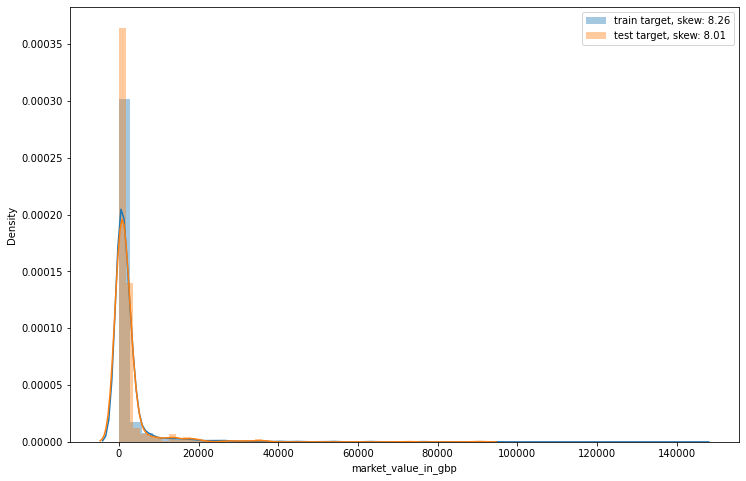

In [53]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(y_train, label=f'train target, skew: {y_train.skew():.2f}')
sns.distplot(y_test, label=f'test target, skew: {y_test.skew():.2f}')
plt.legend(loc='best')
plt.show()

The target variable is positively skewed, we can perform a log transformation to render the target distribution more gaussian like to **avoid biasing our ML model** to the majority labels.

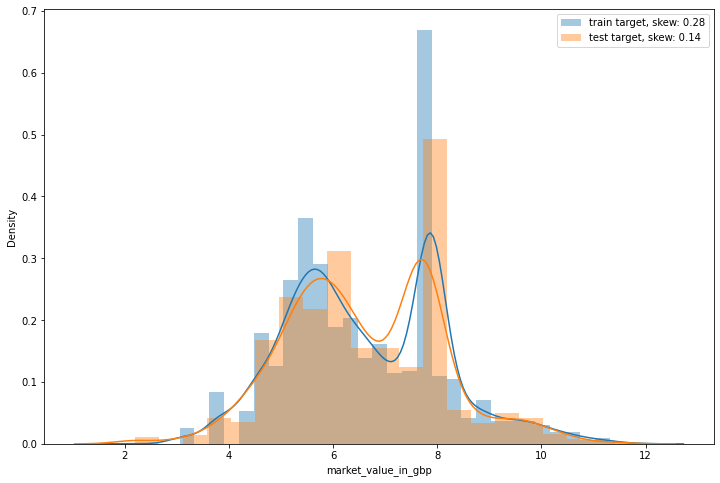

In [54]:
# log transform target
y_train = np.log(y_train)
y_test = np.log(y_test)

# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(y_train, label=f'train target, skew: {y_train.skew():.2f}')
sns.distplot(y_test, label=f'test target, skew: {y_test.skew():.2f}')
plt.legend(loc='best')
plt.show()

We perform the log transformation on the target variable for the following reasons:
1. Log transform guarantees all values are POSITIVE. In many real-world appications the labels are naturally positive.
2. Log transform makes large numbers even larger, pulling the distribution to the right to bigger values.
3. Alternatively, the log transform makes smaller numbers even smaller, stretching left values even farther away by making smaller. Consequently, the entire distribution gets centered and transformed into a normalized distribution

### Categorical Variables Distributions
We recall the categorical features without the names:

In [55]:
categorical_features_wo_names

['country_of_birth',
 'country_of_citizenship',
 'sub_position',
 'foot',
 'club_position',
 'last_season']

We also remove the "country_of_birth" as well as "country_of_citizenship" from this list for visualization purposes. These features will be visualized later.

In [56]:
categorical_features_rectified = categorical_features_wo_names[2:]
categorical_features_rectified

['sub_position', 'foot', 'club_position', 'last_season']

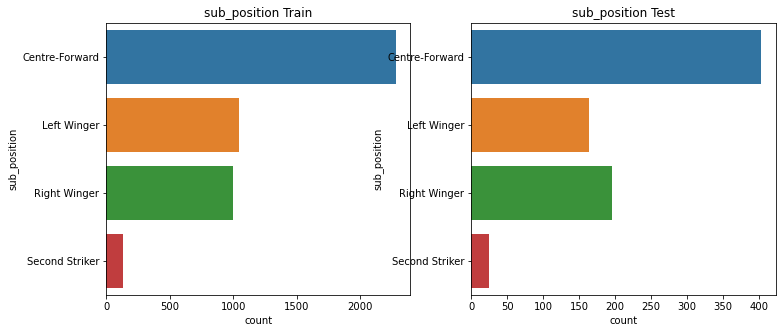

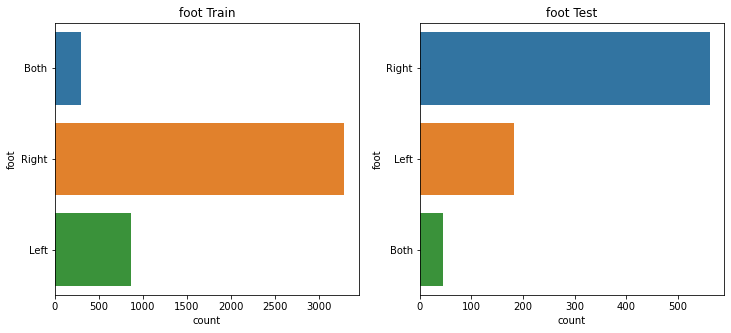

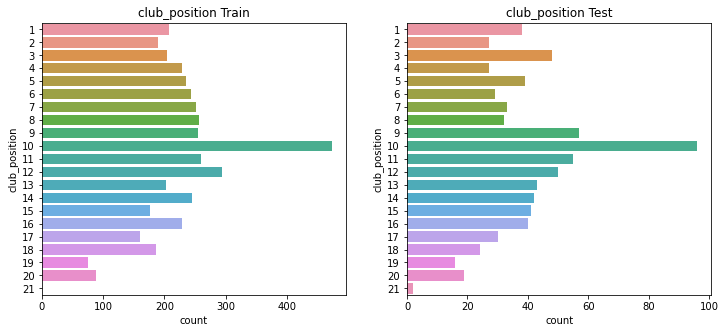

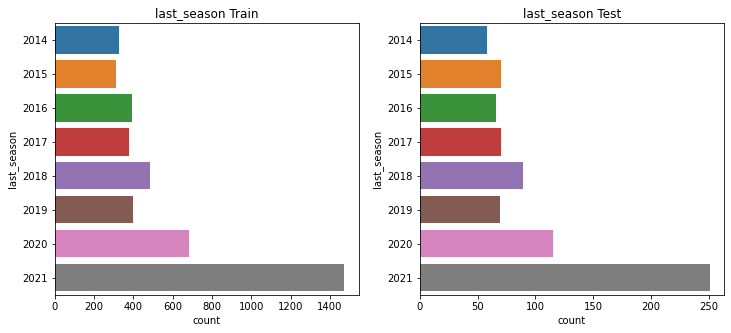

In [57]:
for cat_var in categorical_features_rectified:
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    try:
        sns.countplot(y=cat_var, data=X_train, label='train', ax=ax[0])
        sns.countplot(y=cat_var, data=X_test, label='test', ax=ax[1])
        ax[0].set_title(cat_var + " Train")
        ax[1].set_title(cat_var + " Test")
        plt.show()
    except Exception as e:
        print(e)

For the "country_of_birth" as well as "country_of_citizenship" we perform the following visualization

In [58]:
cob_coc_categorical_features = categorical_features_wo_names[:2]
cob_coc_categorical_features

['country_of_birth', 'country_of_citizenship']

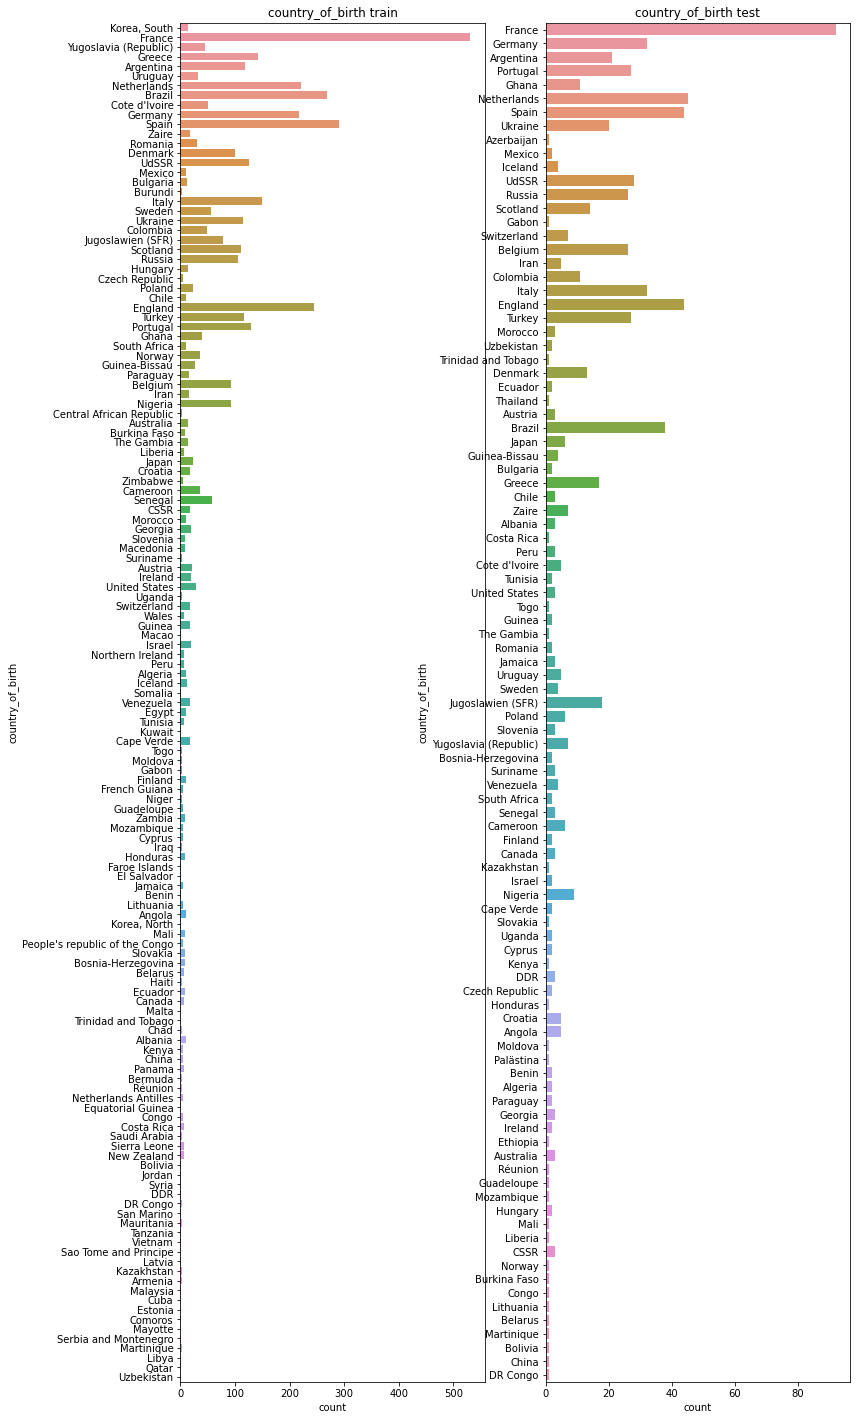

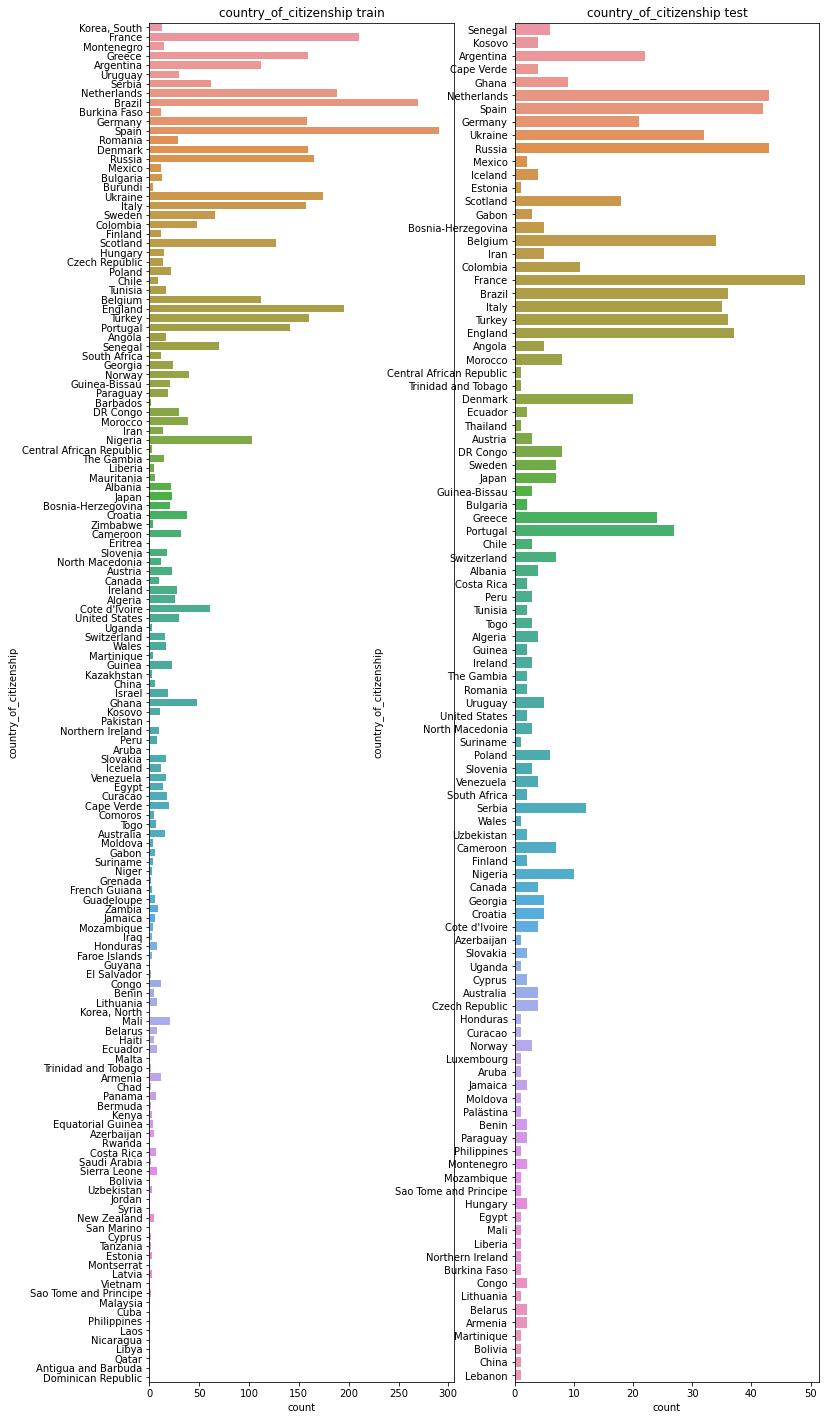

In [59]:
for col in cob_coc_categorical_features:
    fig, ax = plt.subplots(1, 2, figsize=(12,25))
    sns.countplot(y= col, data= X_train, label= "train", ax=ax[0])
    ax[0].set_title(f"{col} train")
    sns.countplot(y= col, data= X_test,label= "test", ax=ax[1])
    ax[1].set_title(f"{col} test")        
    plt.show()

### Influence Categorical Features on Player Market Value
Recalling categorical features:

In [60]:
categorical_features_rectified

['sub_position', 'foot', 'club_position', 'last_season']

We note in the following bar plot: 
- the lines signify the confidence interval

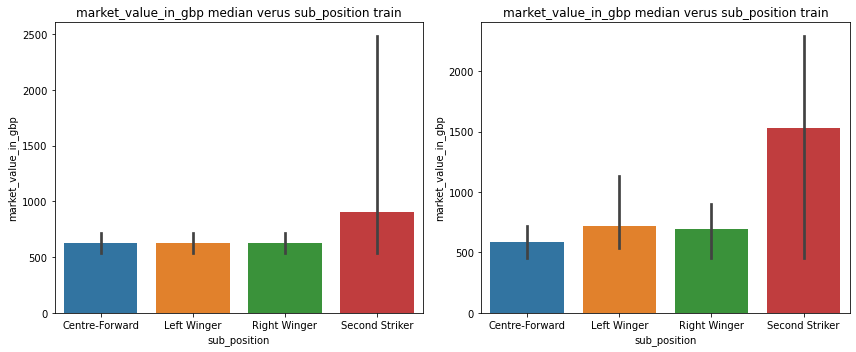

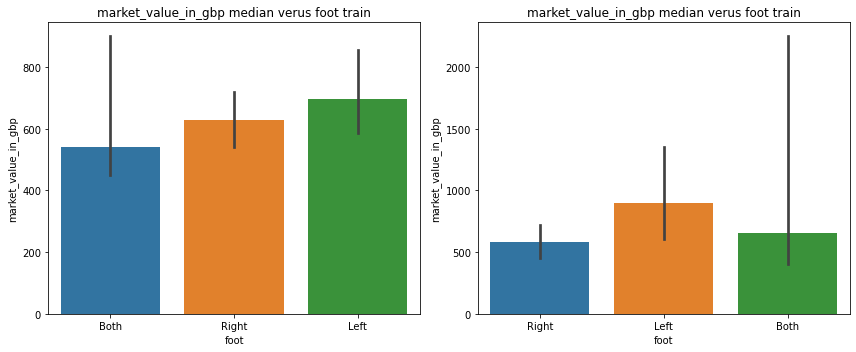

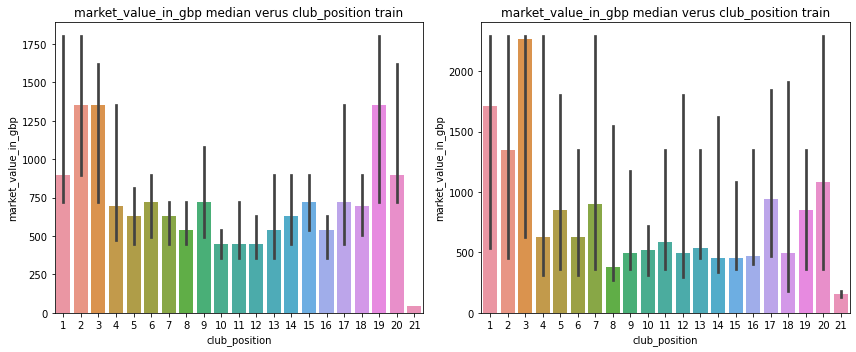

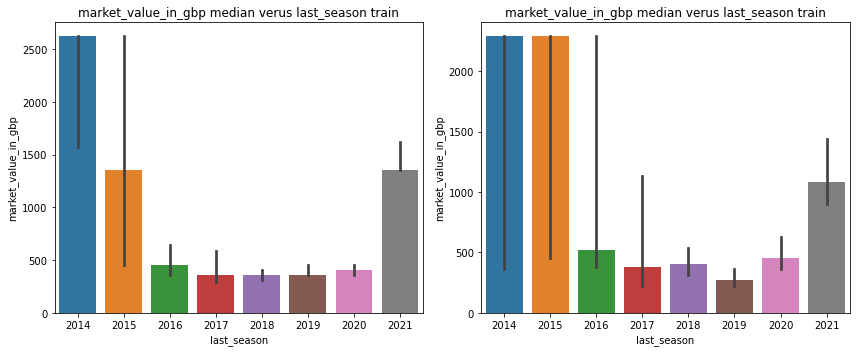

In [61]:
for col in categorical_features_rectified:
    try:
        fig, ax = plt.subplots(1,2, figsize=(12,5))
        sns.barplot(x=X_train[col], y=np.exp(y_train), estimator=np.median, ax=ax[0])
        ax[0].set_title(f"market_value_in_gbp median verus {col} train")
        sns.barplot(x=X_test[col], y=np.exp(y_test), estimator=np.median, ax=ax[1])
        ax[1].set_title(f"market_value_in_gbp median verus {col} train")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(e)

### Player Specific Numerical Features Distributions

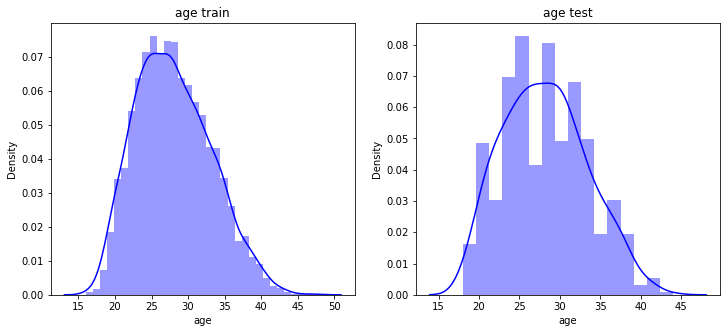

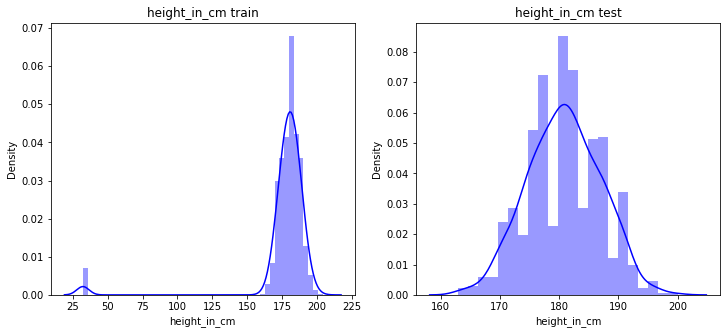

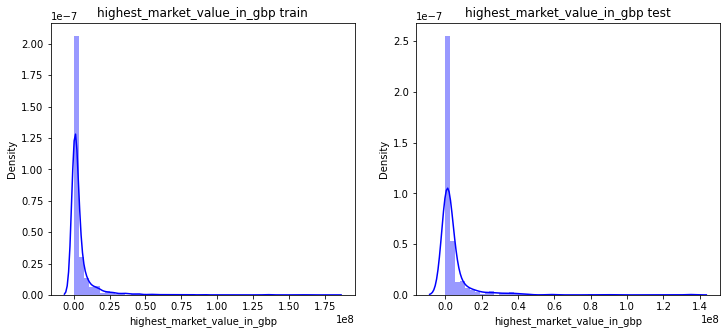

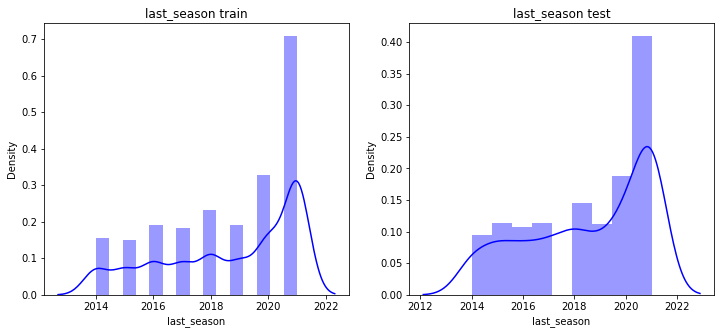

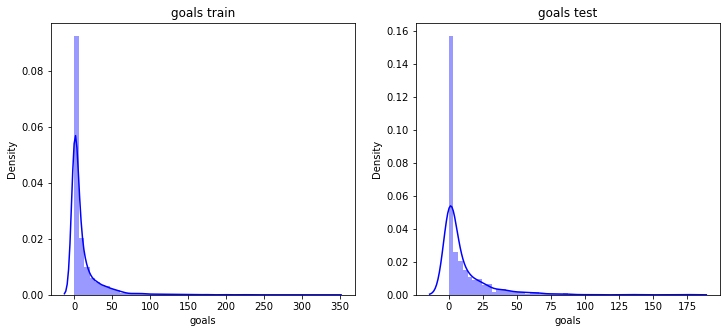

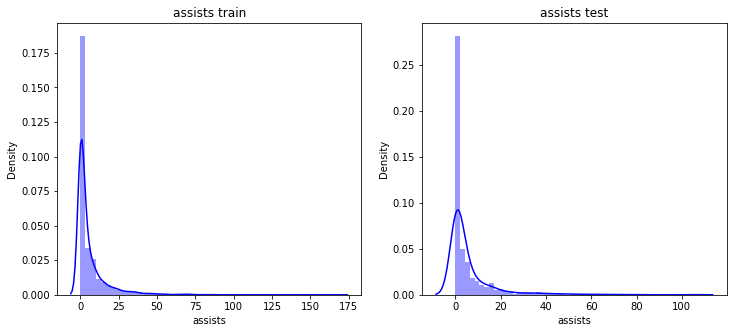

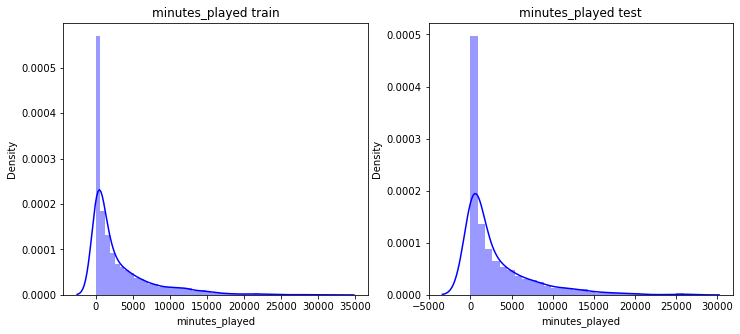

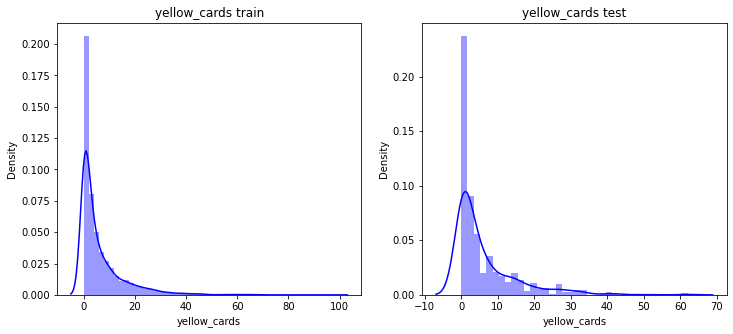

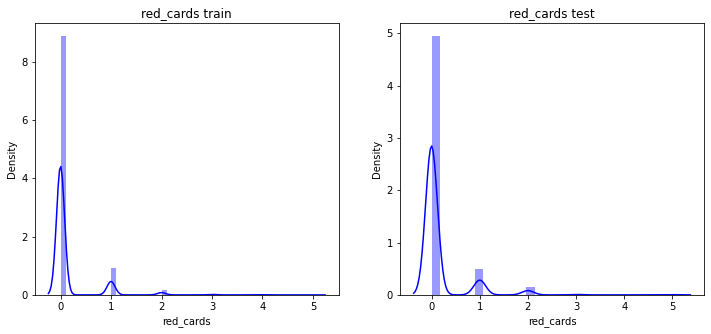

In [62]:
# Player Properties variables
player_prop_cols = ["age", "height_in_cm", "highest_market_value_in_gbp", "last_season", "goals", "assists", "minutes_played", "yellow_cards", "red_cards"]

for col in player_prop_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    sns.distplot(X_train[col], ax=ax[0], color= "blue")
    ax[0].set_title(f"{col} train")
    sns.distplot(X_test[col], ax=ax[1], color= "blue")
    ax[1].set_title(f"{col} test")        
    plt.show()

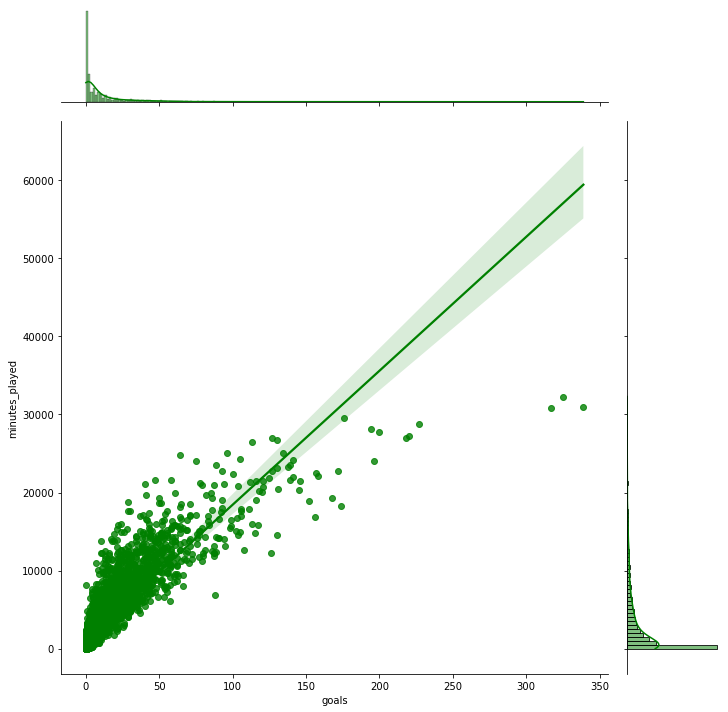

In [63]:
g = sns.jointplot("goals", "minutes_played", data=X_train, kind="reg", color = 'green', size = 10)

### Club Specific Numerical Features Distributions

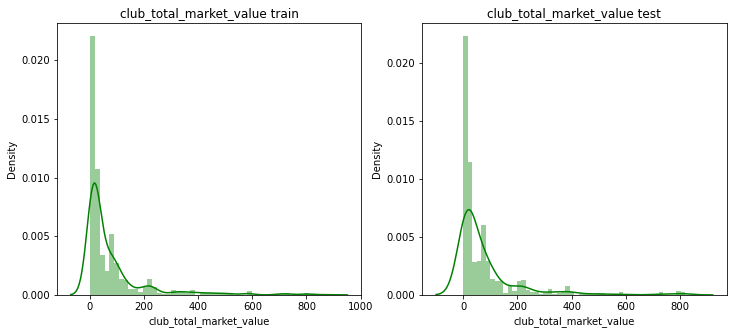

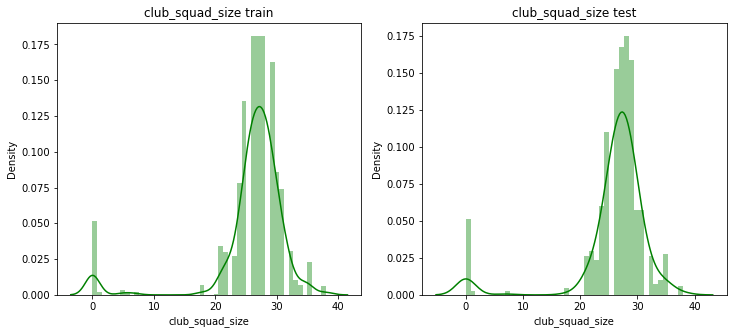

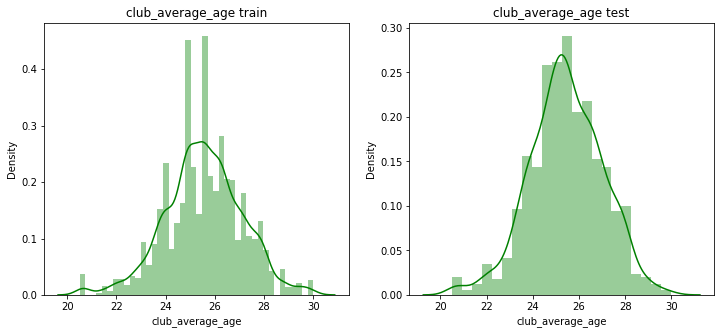

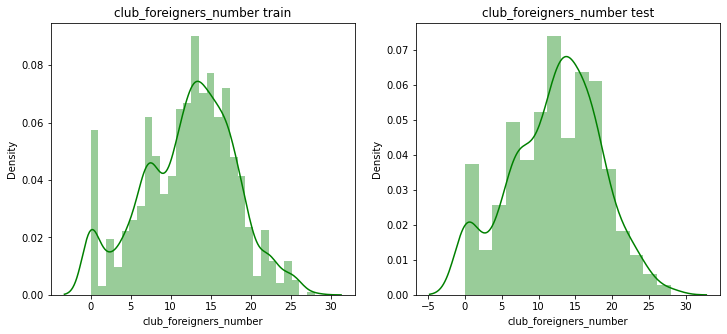

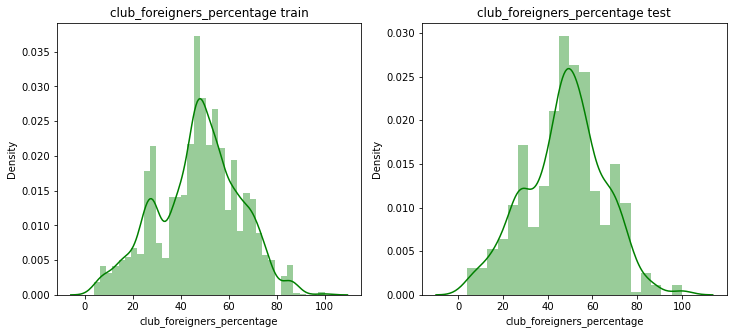

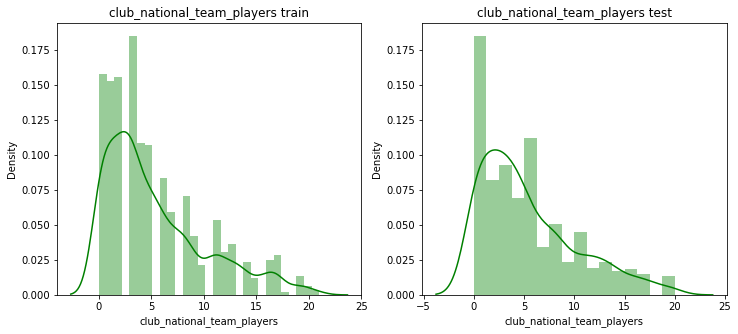

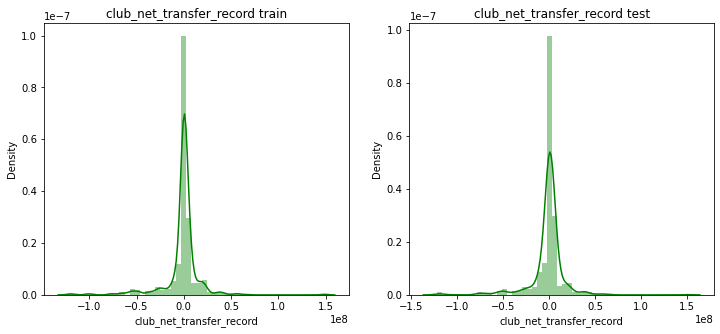

In [64]:
# club Properties variables
club_prop_cols = ["club_total_market_value", "club_squad_size", "club_average_age", "club_foreigners_number", "club_foreigners_percentage", "club_national_team_players", "club_net_transfer_record"]

for col in club_prop_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    sns.distplot(X_train[col], ax=ax[0], color= "green")
    ax[0].set_title(f"{col} train")
    sns.distplot(X_test[col], ax=ax[1], color= "green")
    ax[1].set_title(f"{col} test")        
    plt.show()

### Influence of Some Numerical Features on the Target Variable

In [65]:
num_cols = club_prop_cols + player_prop_cols
num_cols

['club_total_market_value',
 'club_squad_size',
 'club_average_age',
 'club_foreigners_number',
 'club_foreigners_percentage',
 'club_national_team_players',
 'club_net_transfer_record',
 'age',
 'height_in_cm',
 'highest_market_value_in_gbp',
 'last_season',
 'goals',
 'assists',
 'minutes_played',
 'yellow_cards',
 'red_cards']

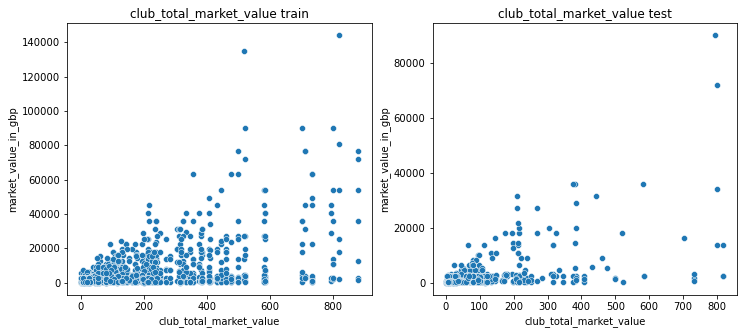

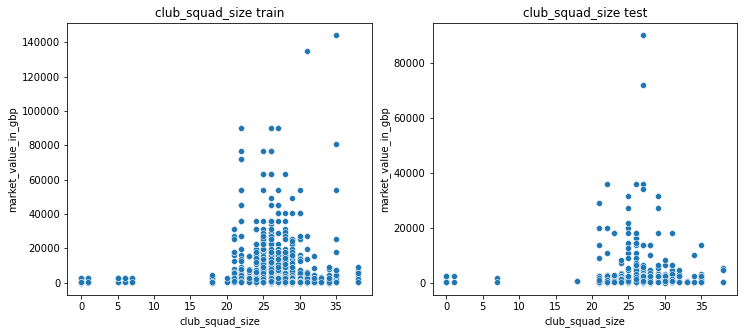

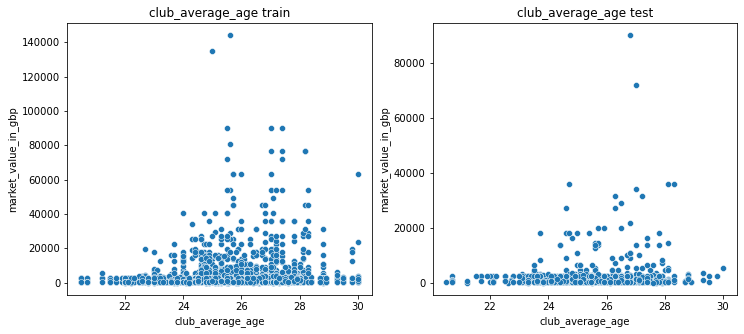

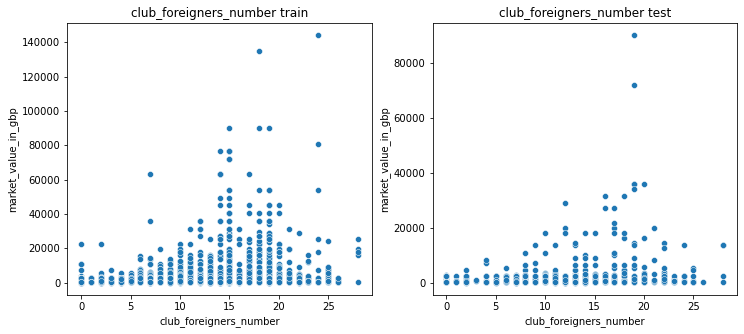

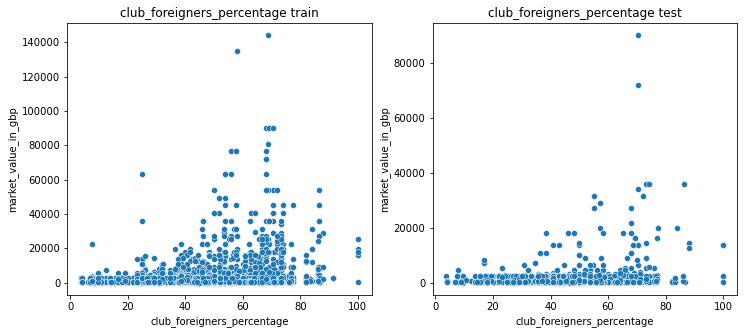

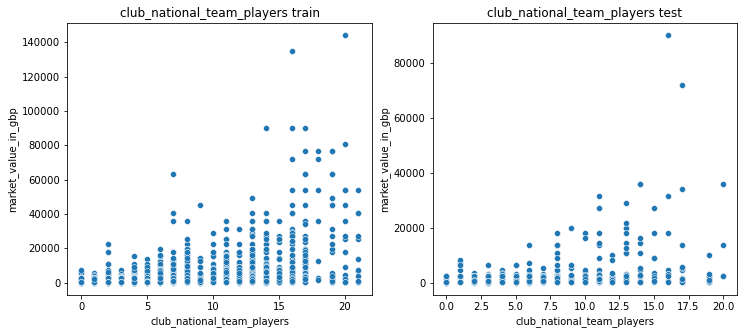

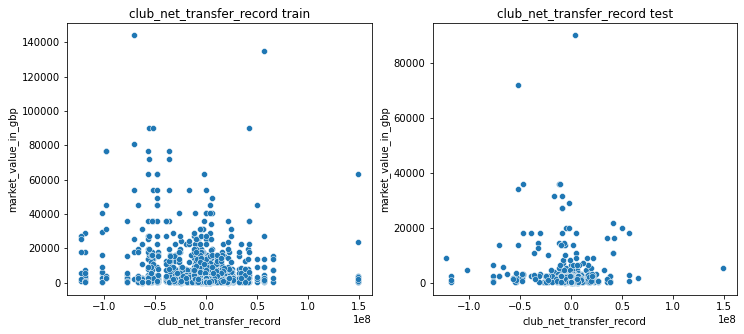

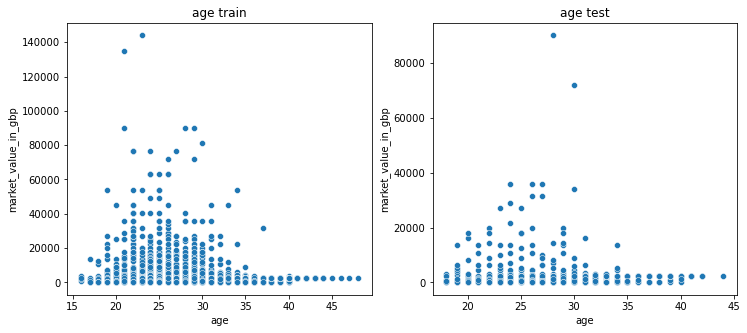

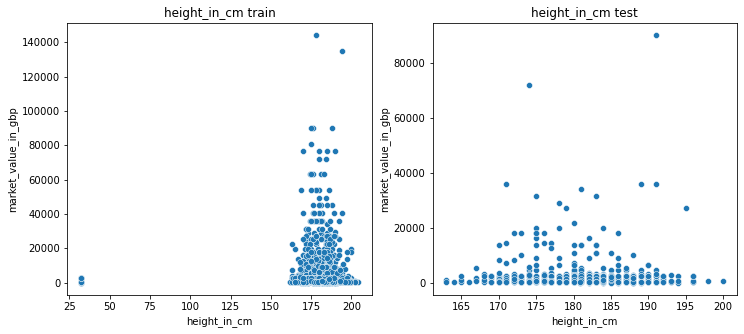

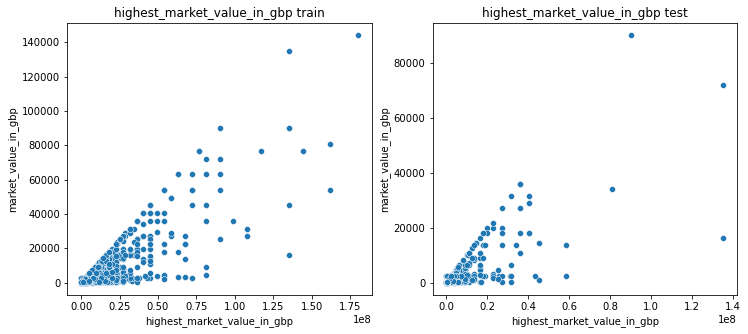

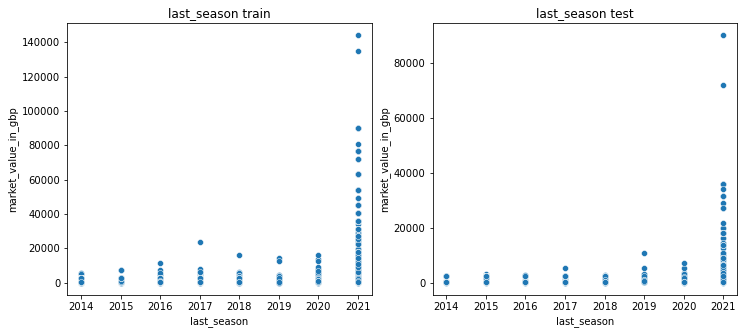

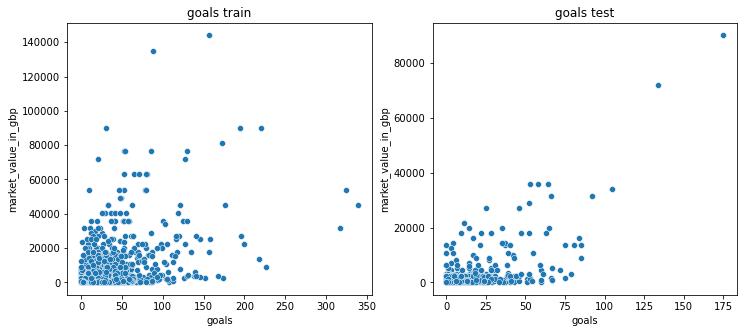

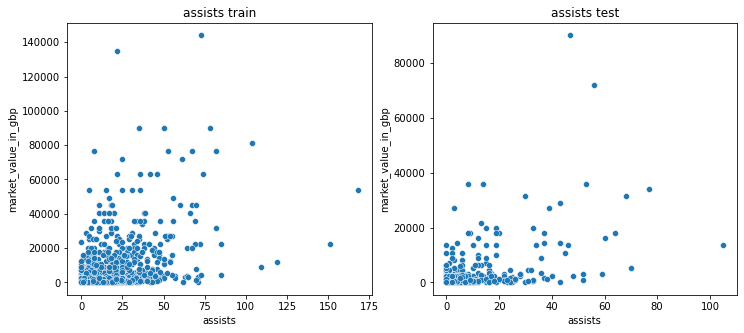

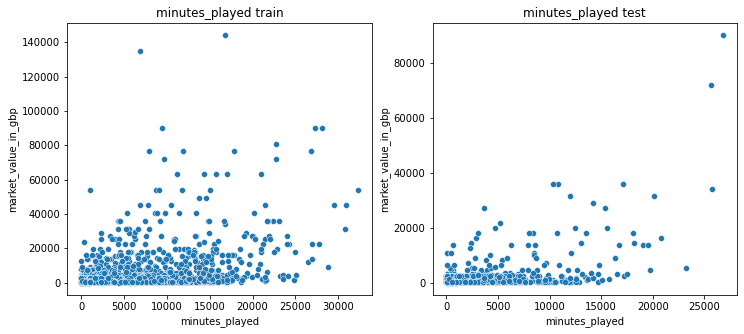

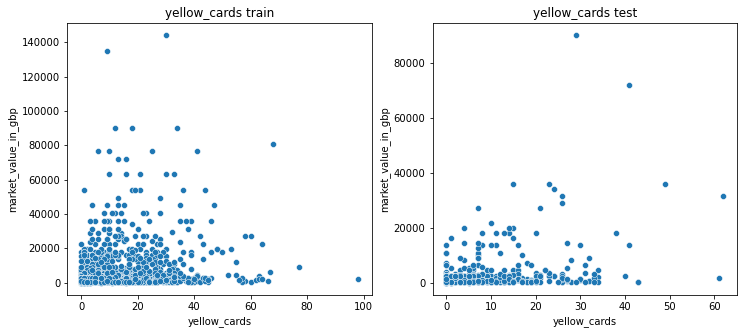

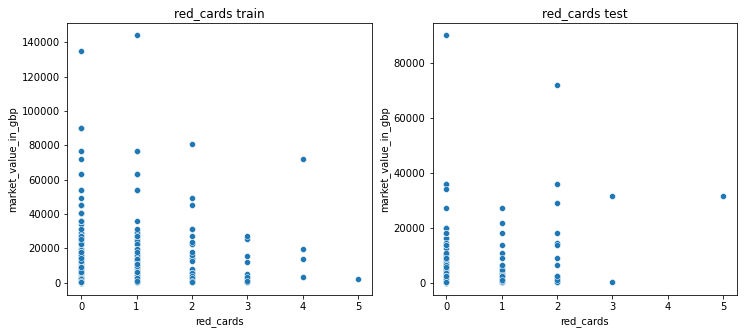

In [66]:
for col in num_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    sns.scatterplot(x=X_train[col], y=np.exp(y_train), ax=ax[0])
    ax[0].set_title(col + " train")
    sns.scatterplot(x=X_test[col], y=np.exp(y_test), ax=ax[1])
    ax[1].set_title(col + " test")        
    plt.show()

### Calculating Correlation

In [67]:
cor = final_df.drop(labels= ["player_id"], axis= 1).corr()
cor.head()

,goals,assists,minutes_played,yellow_cards,red_cards,club_position,goals_first_tier,goals_domestic_cup,goals_uefa_champions_league,goals_europa_league,goals_europa_league_qualifying,goals_uefa_champions_league_qualifying,goals_domestic_super_cup,goals_fifa_club_world_cup,goals_uefa_super_cup,goals_uefa_europa_conference_league_qualifiers,assists_first_tier,assists_domestic_cup,assists_uefa_champions_league,assists_europa_league,assists_europa_league_qualifying,assists_uefa_champions_league_qualifying,assists_domestic_super_cup,assists_fifa_club_world_cup,assists_uefa_super_cup,assists_uefa_europa_conference_league_qualifiers,minutes_played_first_tier,minutes_played_domestic_cup,minutes_played_uefa_champions_league,minutes_played_europa_league,minutes_played_europa_league_qualifying,minutes_played_uefa_champions_league_qualifying,minutes_played_domestic_super_cup,minutes_played_fifa_club_world_cup,minutes_played_uefa_super_cup,minutes_played_uefa_europa_conference_league_qualifiers,last_season,age,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,club_total_market_value,club_squad_size,club_average_age,club_foreigners_number,club_foreigners_percentage,club_national_team_players,club_net_transfer_record
goals,1.000000,0.813466,0.875262,0.695962,0.356840,-0.129202,0.990391,0.711265,0.682448,0.580123,0.310084,0.275656,0.507310,0.314859,0.325725,0.045277,0.799233,0.520502,0.574820,0.452849,0.206965,0.208104,0.317435,0.306993,0.214261,0.041745,0.840349,0.654025,0.701703,0.574008,0.301977,0.289122,0.598833,0.344874,0.333406,0.053222,0.318043,0.193650,0.078912,0.532476,0.703189,0.415631,0.069587,0.136736,0.155621,0.148854,0.360792,-0.148854
assists,0.813466,1.000000,0.887737,0.699611,0.368993,-0.141722,0.797037,0.604910,0.586525,0.474308,0.257083,0.254303,0.418081,0.227263,0.269320,0.032905,0.988279,0.672062,0.653848,0.534675,0.275094,0.257151,0.360238,0.234945,0.208002,0.046821,0.849674,0.684156,0.714163,0.580971,0.323548,0.311390,0.597906,0.272084,0.320371,0.062252,0.334063,0.158744,0.051589,0.524306,0.689748,0.429725,0.071345,0.137879,0.159865,0.154360,0.369610,-0.154011
minutes_played,0.875262,0.887737,1.000000,0.830181,0.408233,-0.123419,0.883919,0.644299,0.464310,0.518294,0.295898,0.247971,0.345982,0.177264,0.224995,0.028938,0.894574,0.581774,0.464253,0.496953,0.251988,0.219114,0.260456,0.182702,0.158113,0.045857,0.990378,0.744093,0.575158,0.620580,0.366560,0.306407,0.500168,0.216581,0.264262,0.065143,0.391603,0.233614,0.085791,0.467024,0.620008,0.355761,0.086168,0.168244,0.149882,0.131748,0.328666,-0.128966
yellow_cards,0.695962,0.699611,0.830181,1.000000,0.455977,-0.097906,0.707299,0.538846,0.301896,0.436424,0.254642,0.187401,0.261195,0.117941,0.157700,0.016527,0.705861,0.473653,0.332374,0.413953,0.206100,0.163161,0.199568,0.099700,0.118187,0.036474,0.827961,0.633419,0.410766,0.524658,0.309163,0.248886,0.374010,0.099607,0.172995,0.064569,0.344230,0.225243,0.085650,0.323798,0.454263,0.235039,0.073376,0.172755,0.117983,0.103282,0.244193,-0.091313
red_cards,0.356840,0.368993,0.408233,0.455977,1.000000,-0.042080,0.362627,0.238445,0.169175,0.249476,0.140780,0.090312,0.143520,0.044197,0.076062,0.020222,0.378319,0.190835,0.181457,0.220669,0.127540,0.086172,0.108894,0.066738,0.056609,0.018495,0.407005,0.259596,0.236687,0.261709,0.156027,0.146172,0.194454,0.048264,0.076735,0.052227,0.160475,0.118408,0.049074,0.184357,0.256318,0.132219,0.050832,0.077981,0.090407,0.076709,0.147302,-0.062360


In [68]:
cor_target = abs(cor["market_value_in_gbp"])
cor_target.sort_values()

club_squad_size                                            0.013511
assists_uefa_europa_conference_league_qualifiers           0.022209
minutes_played_uefa_europa_conference_league_qualifiers    0.022626
height_in_cm                                               0.033796
goals_uefa_europa_conference_league_qualifiers             0.040104
minutes_played_europa_league_qualifying                    0.072806
club_position                                              0.083919
goals_uefa_champions_league_qualifying                     0.084830
age                                                        0.099488
goals_europa_league_qualifying                             0.106123
minutes_played_uefa_champions_league_qualifying            0.107046
assists_europa_league_qualifying                           0.107073
assists_uefa_champions_league_qualifying                   0.108762
club_average_age                                           0.112117
goals_fifa_club_world_cup                       

From the correleation analysis we can see which features are the 5 most correlated to the target variable:
- highest_market_value_in_gbp
- club_total_market_value
- minutes_played_uefa_champions_league
- goals_uefa_champions_league
- goals

## Feature Engineering
In this final section before model training, we will engineer some of the features in the training dataset like goals/assists and the minutes played. In addition, in this section we will normalize numerical variables and one-hot-encode categorical variables. The full steps conducted in this section are shown below:

- [x] Create a goals per minute feature
- [x] Create an assists per minute feature
- [x] Drop goals and assists features
- [x] Normalize numerical features 
- [x] One-Hot-Encode categorical features

### Creating Goals Per Minute Feature

In [69]:
X_train["goals_per_minute"], X_test["goals_per_minute"] = X_train["goals"]/X_train["minutes_played"], X_test["goals"]/X_test["minutes_played"]

In [70]:
X_train, X_test = X_train.drop(labels= ["goals"], axis= 1), X_test.drop(labels= ["goals"], axis= 1)

In [71]:
X_train.head()

,player_id,assists,minutes_played,yellow_cards,red_cards,club_position,goals_first_tier,goals_domestic_cup,goals_uefa_champions_league,goals_europa_league,goals_europa_league_qualifying,goals_uefa_champions_league_qualifying,goals_domestic_super_cup,goals_fifa_club_world_cup,goals_uefa_super_cup,goals_uefa_europa_conference_league_qualifiers,assists_first_tier,assists_domestic_cup,assists_uefa_champions_league,assists_europa_league,assists_europa_league_qualifying,assists_uefa_champions_league_qualifying,assists_domestic_super_cup,assists_fifa_club_world_cup,assists_uefa_super_cup,assists_uefa_europa_conference_league_qualifiers,minutes_played_first_tier,minutes_played_domestic_cup,minutes_played_uefa_champions_league,minutes_played_europa_league,minutes_played_europa_league_qualifying,minutes_played_uefa_champions_league_qualifying,minutes_played_domestic_super_cup,minutes_played_fifa_club_world_cup,minutes_played_uefa_super_cup,minutes_played_uefa_europa_conference_league_qualifiers,last_season,name,country_of_birth,country_of_citizenship,age,sub_position,foot,height_in_cm,highest_market_value_in_gbp,club_name,club_total_market_value,club_squad_size,club_average_age,club_foreigners_number,club_foreigners_percentage,club_national_team_players,club_net_transfer_record,goals_per_minute
2910,260166,7,6032,5,0,17,28,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,6032,0,0,0,0,0,0,0,0,0,2021,ui-jo-hwang,"Korea, South","Korea, South",29.0,Centre-Forward,Both,185.0,4500000.0,fc-girondins-bordeaux,79.16,31.0,25.1,17.0,54.8,9.0,7250000,0.004642
242,23966,4,7091,9,1,9,41,0,0,3,1,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,6394,0,0,476,131,90,0,0,0,0,2020,jeremy-perbet,France,France,37.0,Centre-Forward,Right,184.0,2250000.0,oud-heverlee-leuven,20.93,28.0,24.6,14.0,50.0,9.0,2700000,0.006346
2418,208446,1,71,0,0,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,71,0,0,0,0,0,0,0,0,2016,darko-zoric,Yugoslavia (Republic),Montenegro,28.0,Left Winger,Left,188.0,630000.0,aek-athen,47.52,29.0,27.7,20.0,69.0,15.0,-1990000,0.000000
4196,416492,0,255,2,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108,147,0,0,0,0,0,0,0,0,2018,okan-suleiman,Greece,Greece,22.0,Left Winger,Left,173.0,135000.0,ao-xanthi,5.36,30.0,26.3,8.0,26.7,1.0,0,0.000000
2473,214316,29,11190,24,0,4,26,9,2,10,0,0,0,0,0,0,18,3,2,6,0,0,0,0,0,0,7588,1438,586,1433,0,0,78,0,67,0,2020,luciano-vietto,Argentina,Argentina,28.0,Left Winger,Right,173.0,18000000.0,sporting-lissabon,235.08,24.0,26.0,11.0,45.8,11.0,-5520000,0.004200


### Creating Assists Per minute Feature

In [72]:
X_train["assists_per_minute"], X_test["assists_per_minute"] = X_train["assists"]/X_train["minutes_played"], X_test["assists"]/X_test["minutes_played"]

In [73]:
X_train, X_test = X_train.drop(labels= ["assists"], axis= 1), X_test.drop(labels= ["assists"], axis= 1)

In [74]:
X_train.head()

,player_id,minutes_played,yellow_cards,red_cards,club_position,goals_first_tier,goals_domestic_cup,goals_uefa_champions_league,goals_europa_league,goals_europa_league_qualifying,goals_uefa_champions_league_qualifying,goals_domestic_super_cup,goals_fifa_club_world_cup,goals_uefa_super_cup,goals_uefa_europa_conference_league_qualifiers,assists_first_tier,assists_domestic_cup,assists_uefa_champions_league,assists_europa_league,assists_europa_league_qualifying,assists_uefa_champions_league_qualifying,assists_domestic_super_cup,assists_fifa_club_world_cup,assists_uefa_super_cup,assists_uefa_europa_conference_league_qualifiers,minutes_played_first_tier,minutes_played_domestic_cup,minutes_played_uefa_champions_league,minutes_played_europa_league,minutes_played_europa_league_qualifying,minutes_played_uefa_champions_league_qualifying,minutes_played_domestic_super_cup,minutes_played_fifa_club_world_cup,minutes_played_uefa_super_cup,minutes_played_uefa_europa_conference_league_qualifiers,last_season,name,country_of_birth,country_of_citizenship,age,sub_position,foot,height_in_cm,highest_market_value_in_gbp,club_name,club_total_market_value,club_squad_size,club_average_age,club_foreigners_number,club_foreigners_percentage,club_national_team_players,club_net_transfer_record,goals_per_minute,assists_per_minute
2910,260166,6032,5,0,17,28,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,6032,0,0,0,0,0,0,0,0,0,2021,ui-jo-hwang,"Korea, South","Korea, South",29.0,Centre-Forward,Both,185.0,4500000.0,fc-girondins-bordeaux,79.16,31.0,25.1,17.0,54.8,9.0,7250000,0.004642,0.001160
242,23966,7091,9,1,9,41,0,0,3,1,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,6394,0,0,476,131,90,0,0,0,0,2020,jeremy-perbet,France,France,37.0,Centre-Forward,Right,184.0,2250000.0,oud-heverlee-leuven,20.93,28.0,24.6,14.0,50.0,9.0,2700000,0.006346,0.000564
2418,208446,71,0,0,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,71,0,0,0,0,0,0,0,0,2016,darko-zoric,Yugoslavia (Republic),Montenegro,28.0,Left Winger,Left,188.0,630000.0,aek-athen,47.52,29.0,27.7,20.0,69.0,15.0,-1990000,0.000000,0.014085
4196,416492,255,2,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108,147,0,0,0,0,0,0,0,0,2018,okan-suleiman,Greece,Greece,22.0,Left Winger,Left,173.0,135000.0,ao-xanthi,5.36,30.0,26.3,8.0,26.7,1.0,0,0.000000,0.000000
2473,214316,11190,24,0,4,26,9,2,10,0,0,0,0,0,0,18,3,2,6,0,0,0,0,0,0,7588,1438,586,1433,0,0,78,0,67,0,2020,luciano-vietto,Argentina,Argentina,28.0,Left Winger,Right,173.0,18000000.0,sporting-lissabon,235.08,24.0,26.0,11.0,45.8,11.0,-5520000,0.004200,0.002592


### Normalize Numerical Features and One-Hot-Encode Categorical Features

In [75]:
X_train, X_test = X_train.drop(labels= ["player_id", "name", "country_of_birth"], axis= 1), X_test.drop(labels= ["player_id"], axis= 1)

In [76]:
all_vars = X_train.columns.to_list()

cat_vars = ['club_position', 'last_season', 'country_of_citizenship', 'sub_position', 'foot', 'club_name']
num_vars = list(set(all_vars) - set(cat_vars))

In [77]:
# Select & separate the categorical & numerical columns in the training data
X_train_cat = X_train[[c for c in X_train.columns if c in cat_vars]]
X_train_num = X_train[[c for c in X_train.columns if c in num_vars]]

#  Select & separate the categorical & numerical columns in the testing data
X_test_cat = X_test[[c for c in X_test.columns if c in cat_vars]]
X_test_num = X_test[[c for c in X_test.columns if c in num_vars]]

In [78]:
# Standardizing numerical feature columns
scaler = StandardScaler()
X_train_num_1 = scaler.fit_transform(X_train_num) 

X_test_num_1 = scaler.transform(X_test_num)

In [79]:
# One-hot encoding categorical feature columns
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
X_train_cat_1 = ohe.fit_transform(X_train_cat) 

X_test_cat_1 = ohe.transform(X_test_cat)

In [80]:
# Put all features back together into a total training and testing sets
X_train_new = np.concatenate((X_train_cat_1, X_train_num_1) , axis=1)
X_test_new = np.concatenate((X_test_cat_1, X_test_num_1) , axis=1)

In [81]:
print(f"Final X_train/X_test <X_train_new>/<X_test_new> have {X_train_new.shape[1]} features")
print(f"X_train_new has shape: {X_train_new.shape}\nX_test_new has shape: {X_test_new.shape}")

Final X_train/X_test <X_train_new>/<X_test_new> have 604 features
X_train_new has shape: (4459, 604)
X_test_new has shape: (788, 604)


## Regression Model Training
In this part, we will attempt to train a machine learning model to predict the target variable market_value_in_gbp. The following models will be trained: 

- [x] LinearRegression
- [x] SVR
- [x] RandomForestRegressor
- [x] GradientBoostingRegressor

In addition we will monitor the following metrics to evaluate our models:
- MSE
- RMSE
- MEAN (Mean Absolute Error)

Metric: MSE, Model: LR: 2714071882157033984.000
Metric: MSE, Model: SVR: 1.237
Metric: MSE, Model: RF: 0.995
Metric: MSE, Model: GB: 1.224
Metric: RMSE, Model: LR: 1647444045.228
Metric: RMSE, Model: SVR: 1.112
Metric: RMSE, Model: RF: 0.998
Metric: RMSE, Model: GB: 1.106
Metric: MAN, Model: LR: 159176601.888
Metric: MAN, Model: SVR: 0.846
Metric: MAN, Model: RF: 0.697
Metric: MAN, Model: GB: 0.898


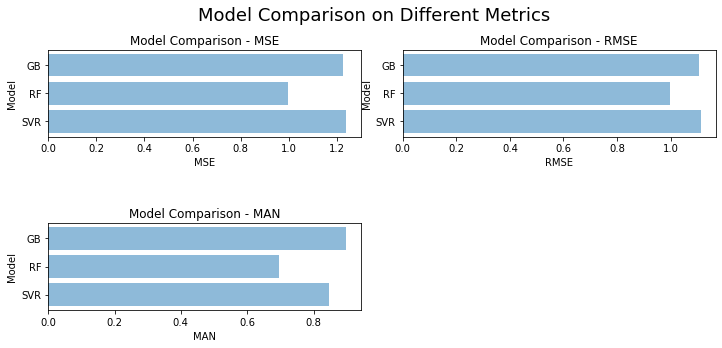

In [82]:
# Train & compare a collection of regressor models
regressor_1 = LinearRegression()
regressor_2 = SVR()
regressor_3 = RandomForestRegressor(random_state= SEED, n_estimators=10)
regressor_4 = GradientBoostingRegressor(random_state= SEED, n_estimators=10)

# Select type of machine learning model
models = []
models.append(regressor_1)
models.append(regressor_2)
models.append(regressor_3)
models.append(regressor_4)

# Train & evaluate each model
metrics = {"MSE": mean_squared_error, "RMSE": mean_squared_error, "MAN": mean_absolute_error}
scores = {"MSE": [], "RMSE": [], "MAN": []}
names = ['LR', 'SVR', 'RF', 'GB']

fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize= (10, 5))
fig.suptitle("Model Comparison on Different Metrics", fontsize=18, y=0.95)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.delaxes(axes[1][1])

for metric, ax in zip(metrics.keys(), axes.ravel()):    
    for i, model in enumerate(models):
        model.fit(X= X_train_new, y= y_train)

        predicted_output = model.predict(X= X_test_new)
        
        if metric == "RMSE":
            score = metrics[metric](y_test, predicted_output, squared= False)
        else:
            score = metrics[metric](y_test, predicted_output)
        
        scores[metric].append(score)
        output = f"Metric: {metric}, Model: {names[i]}: {score:.3f}"
        print(output)
    
    ax.barh(names[1:len(names)], scores[metric][1:len(scores[metric])], align='center', alpha=0.5) # skip LR score
    ax.set_xlabel(metric)
    ax.set_ylabel('Model')
    ax.set_title(f"Model Comparison - {metric}")

fig.subplots_adjust(hspace=1)
plt.show()

Comparing these regression models against the defined metrics, we can choose the RandomForest regression for this specific task since it calculated the lowest metric values accross all the metrics.